## Model Evaluation on Test Set

The **test set** contains **1,953 images** and **755 instances**.  
A large portion of images are **negative (no polyp)** to better reflect real-world screening conditions.  
Most images originate from **video sequences**, where consecutive frames are highly correlated and may **inflate metrics** if treated as independent samples.  

Since these sequences are **raw and unfiltered**, we evaluate model performance on:
- The **full test set** (including sequences)
- The **single-image subset** (excluding correlated frames)

There are **232 single images**, primarily from **center C6**, which differs in distribution from the train/validation dataset.

We evaluate two final models:
- **YOLO11s Detection Model**
- **YOLO11s-Seg (Segmentation) Model**

---

### **YOLO11s — Detection Results**

| Split | Precision | Recall | mAP@50 | mAP@50–95 |
|:------|:----------:|:------:|:-------:|:-----------:|
| Full test (raw, includes sequences) | **0.861** | **0.696** | **0.785** | **0.615** |
| Single images only | **0.949** | **0.788** | **0.903** | **0.684** |

---

### **YOLO11s-Seg — Detection (Box) Metrics**

| Split | Precision | Recall | mAP@50 | mAP@50–95 |
|:------|:----------:|:------:|:-------:|:-----------:|
| Full test (raw, includes sequences) | **0.857** | **0.641** | **0.765** | **0.621** |
| Single images only | **0.939** | **0.839** | **0.918** | **0.712** |

---

### **YOLO11s-Seg — Segmentation (Mask) Metrics**

| Split | Precision | Recall | mAP mask@50 | mAP mask@50–95 |
|:------|:----------:|:------:|:-------------:|:----------------:|
| Full test (raw, includes sequences) | **0.864** | **0.642** | **0.759** | **0.593** |
| Single images only | **0.930** | **0.831** | **0.910** | **0.692** |

---

### **Notes**

- Reporting both **sequence-inclusive** and **single-image** results helps assess **generalization** when near-duplicate frames are present.  
- The **single-image subset (C6-heavy)** highlights **distribution shift** compared to the train/validation data and serves as a **real-world deployment check**.

In [ ]:
from pathlib import Path
import json
import sys
BASE_PATH = ".."
ROOT = Path(BASE_PATH).resolve()  
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))
from IPython.display import Image, display
import importlib
import src.evaluate_yolo 
importlib.reload(src.evaluate_yolo)
from src.evaluate_yolo import evaluate_yolo_model, show_detection_summary

# 1. YOLO 11s Best Detection Model Evaluation

### A. Evaluate on Raw Test Set, No cleaning in Data (Sequences Included):

Report saved to: C:\Users\Betul\Desktop\Projects\Polyp\reports\test_results\y11s_split3_det11\markdown\yolo11s_det1_REPORT.md

**Detection Metrics (Box):**
 Precision:  0.861
 Recall:     0.696
 mAP@50:     0.785
 mAP@50-95:  0.615



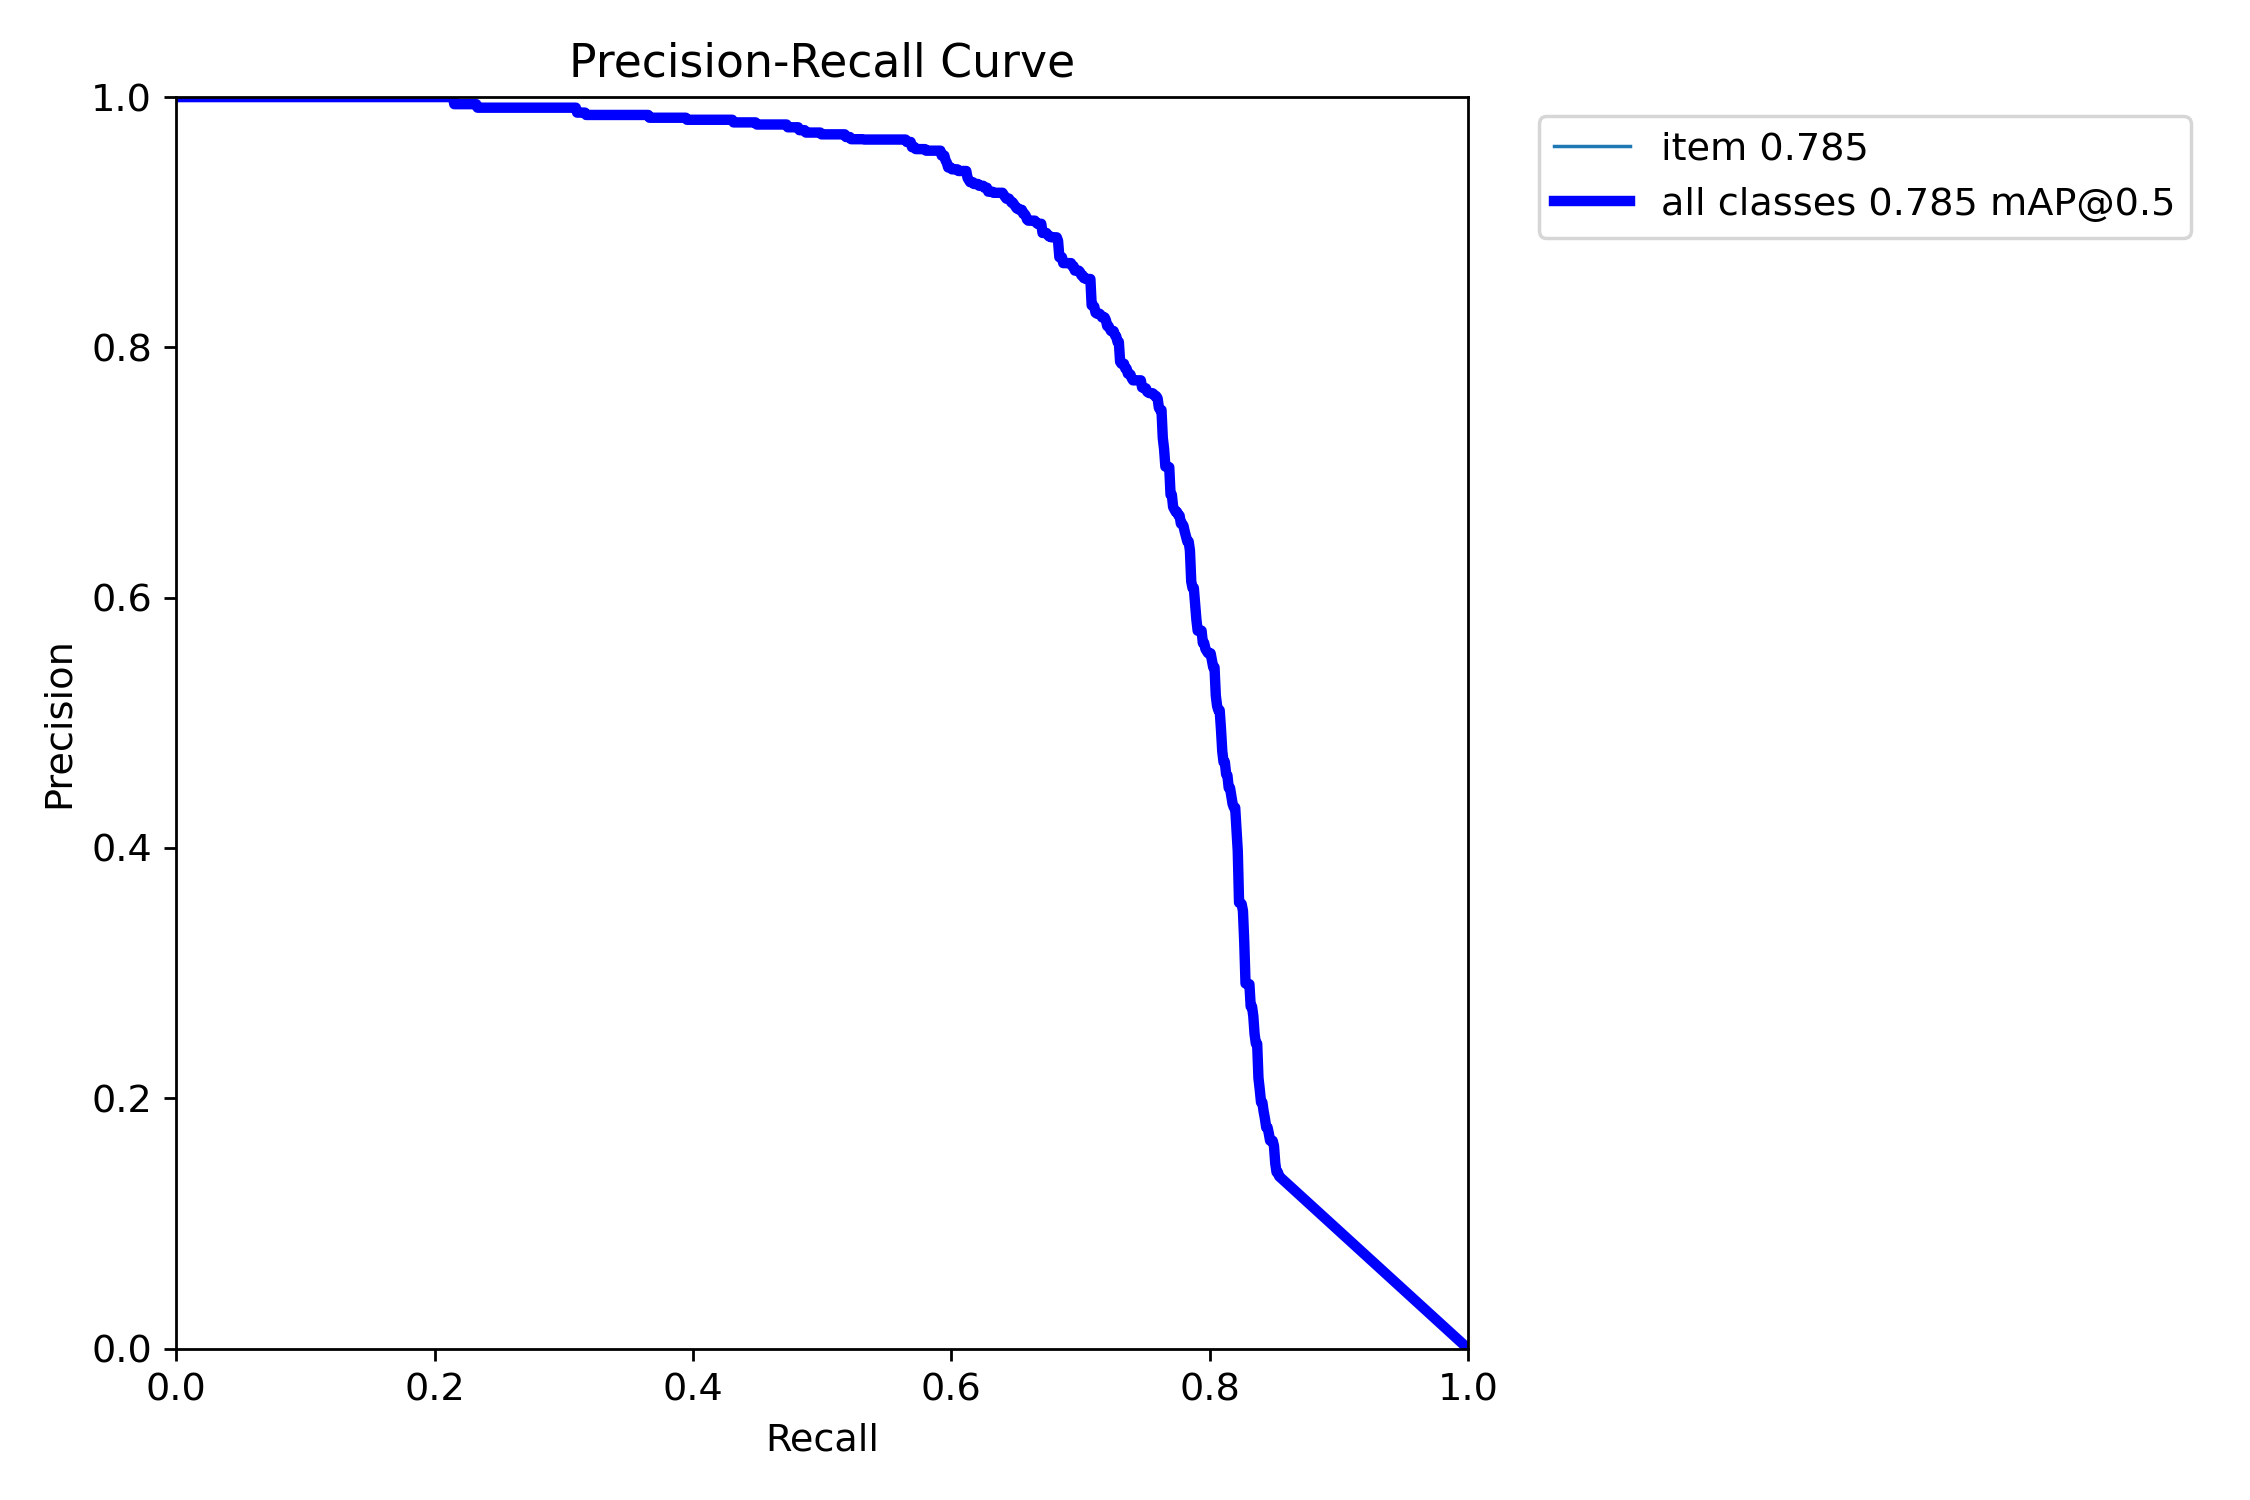
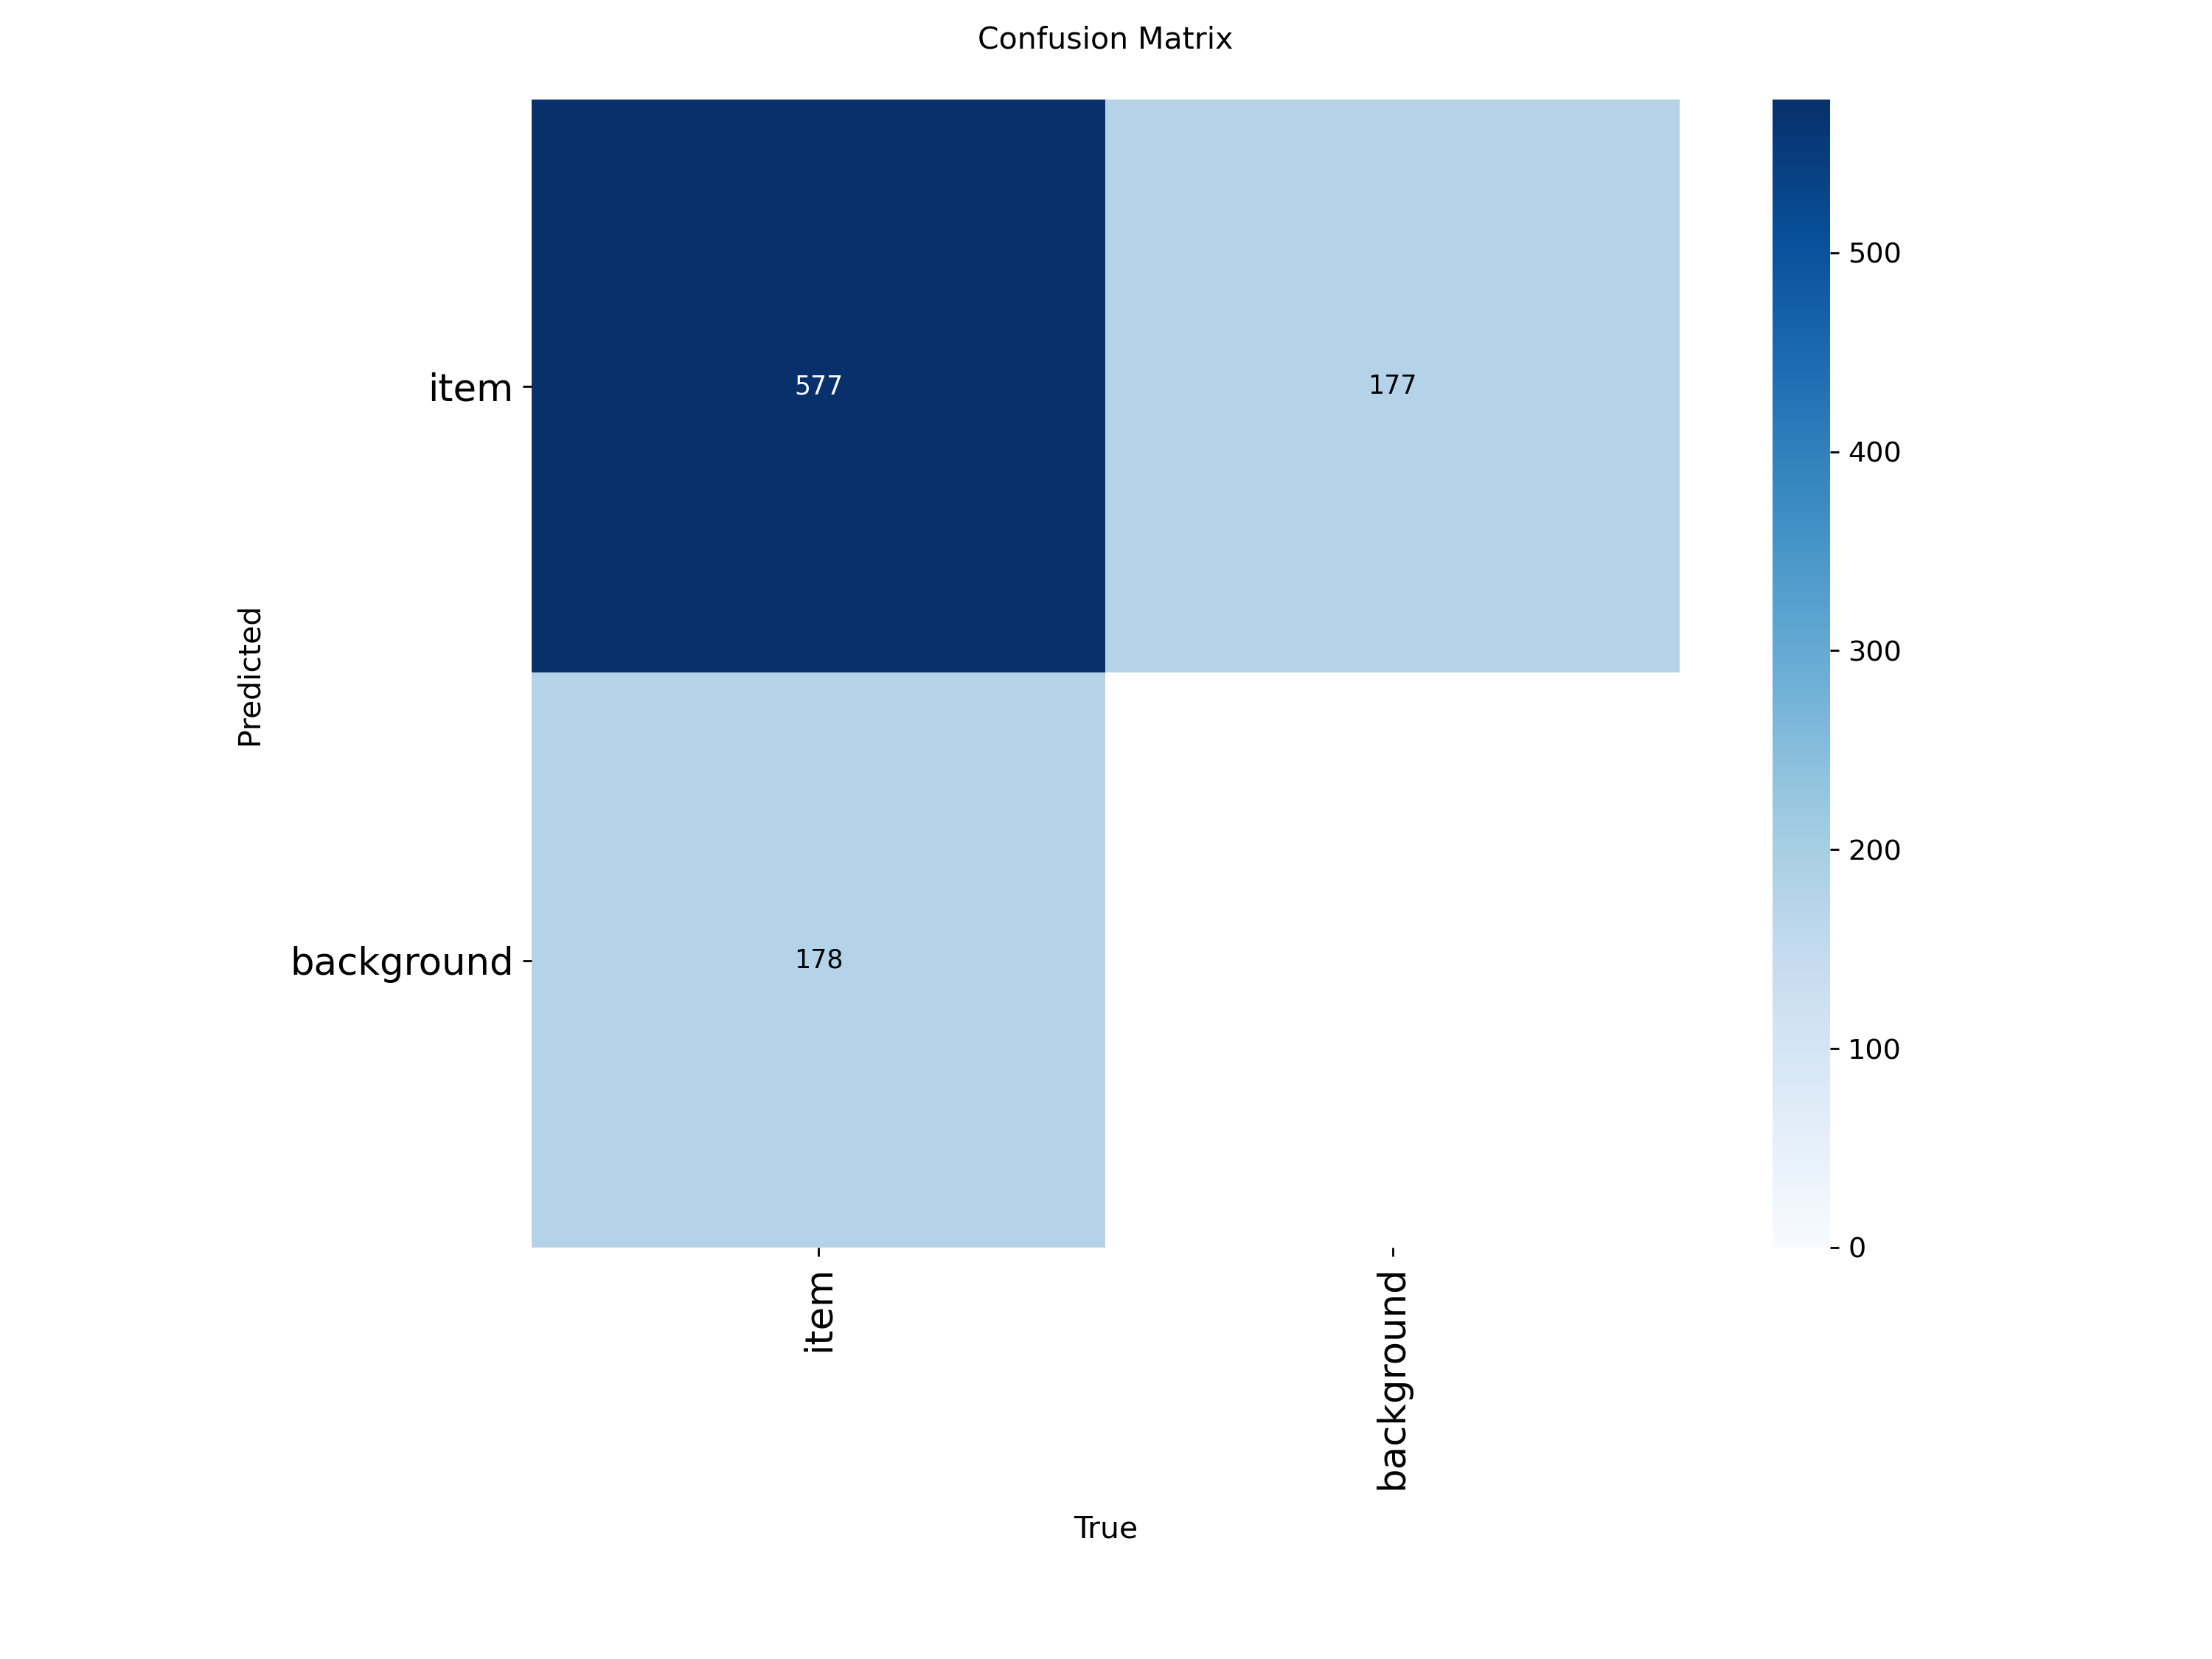

In [6]:
DATA_YAML = ROOT / "configs" / "data_yolo_split3.yaml"
model_path = ROOT / "models" / "yolo11s_det1.pt"
save_dir = ROOT / "reports" / "test_results" / "y11s_split3_det"

metrics = evaluate_yolo_model(model_path, DATA_YAML, split="test", save_dir=save_dir)
show_detection_summary(metrics, scale=0.5)

### B. Evaluate on Single Images:

Report saved to: C:\Users\Betul\Desktop\Projects\Polyp\reports\test_results\y11s_split3_det_single2\markdown\yolo11s_det1_REPORT.md
Detection Metrics:
 Precision:  0.949
 Recall:     0.788
 mAP@50:     0.903
 mAP@50-95:  0.684



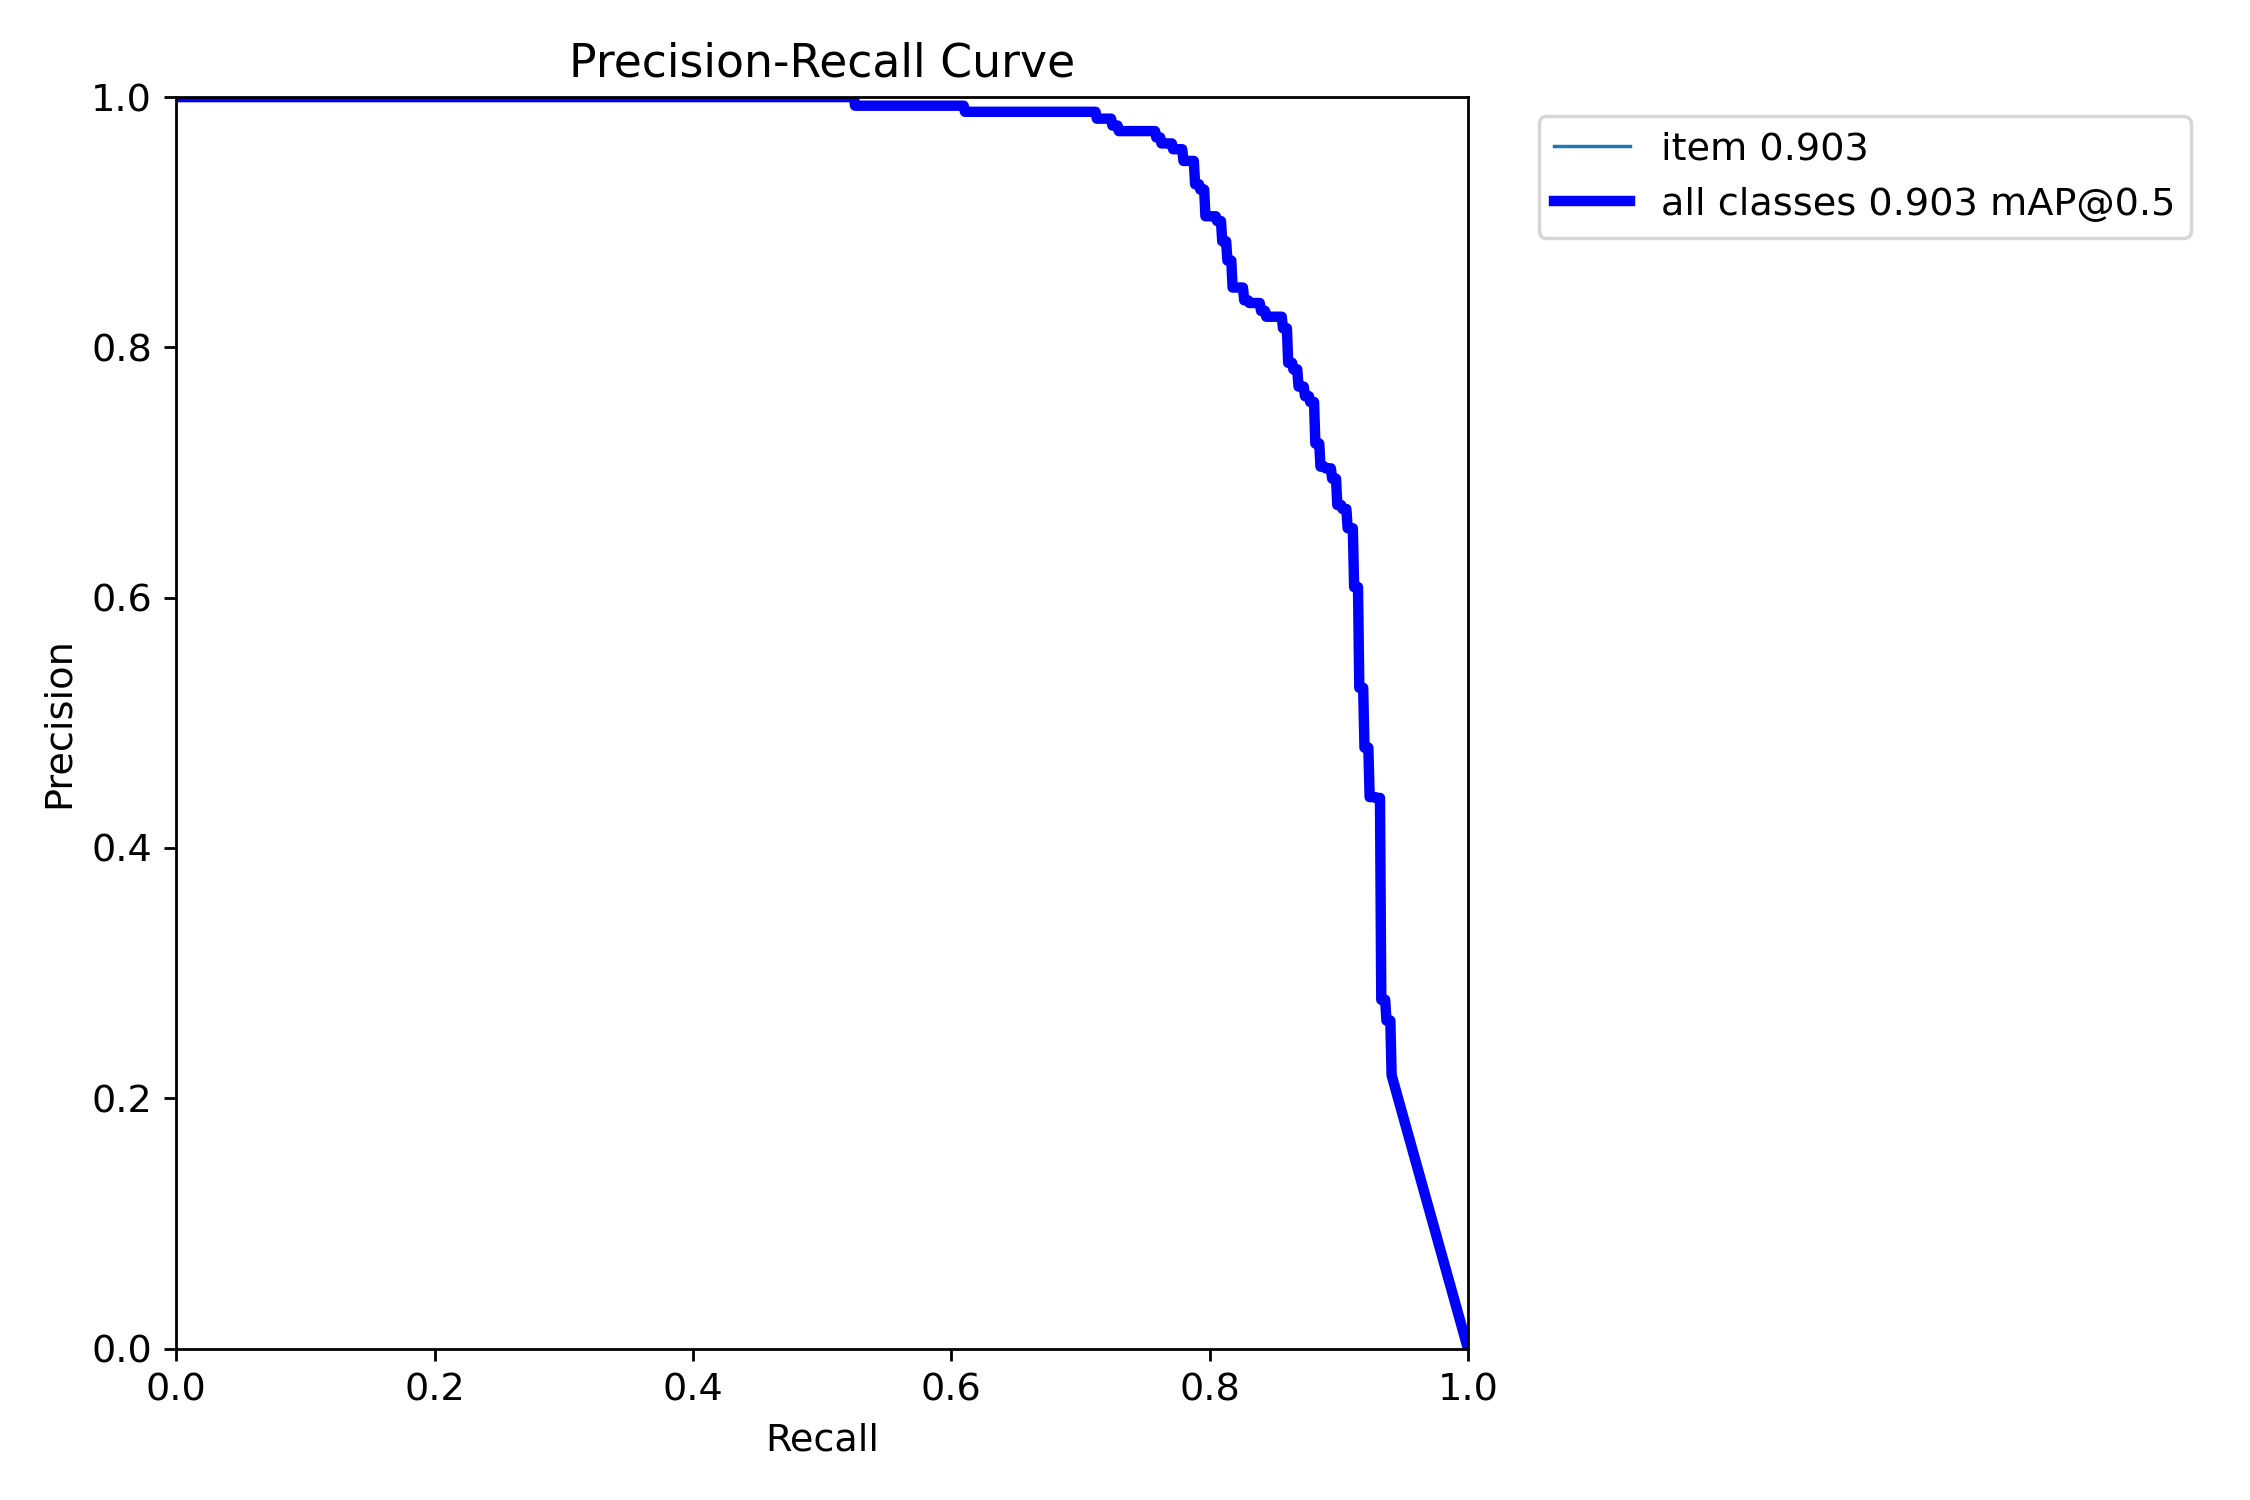
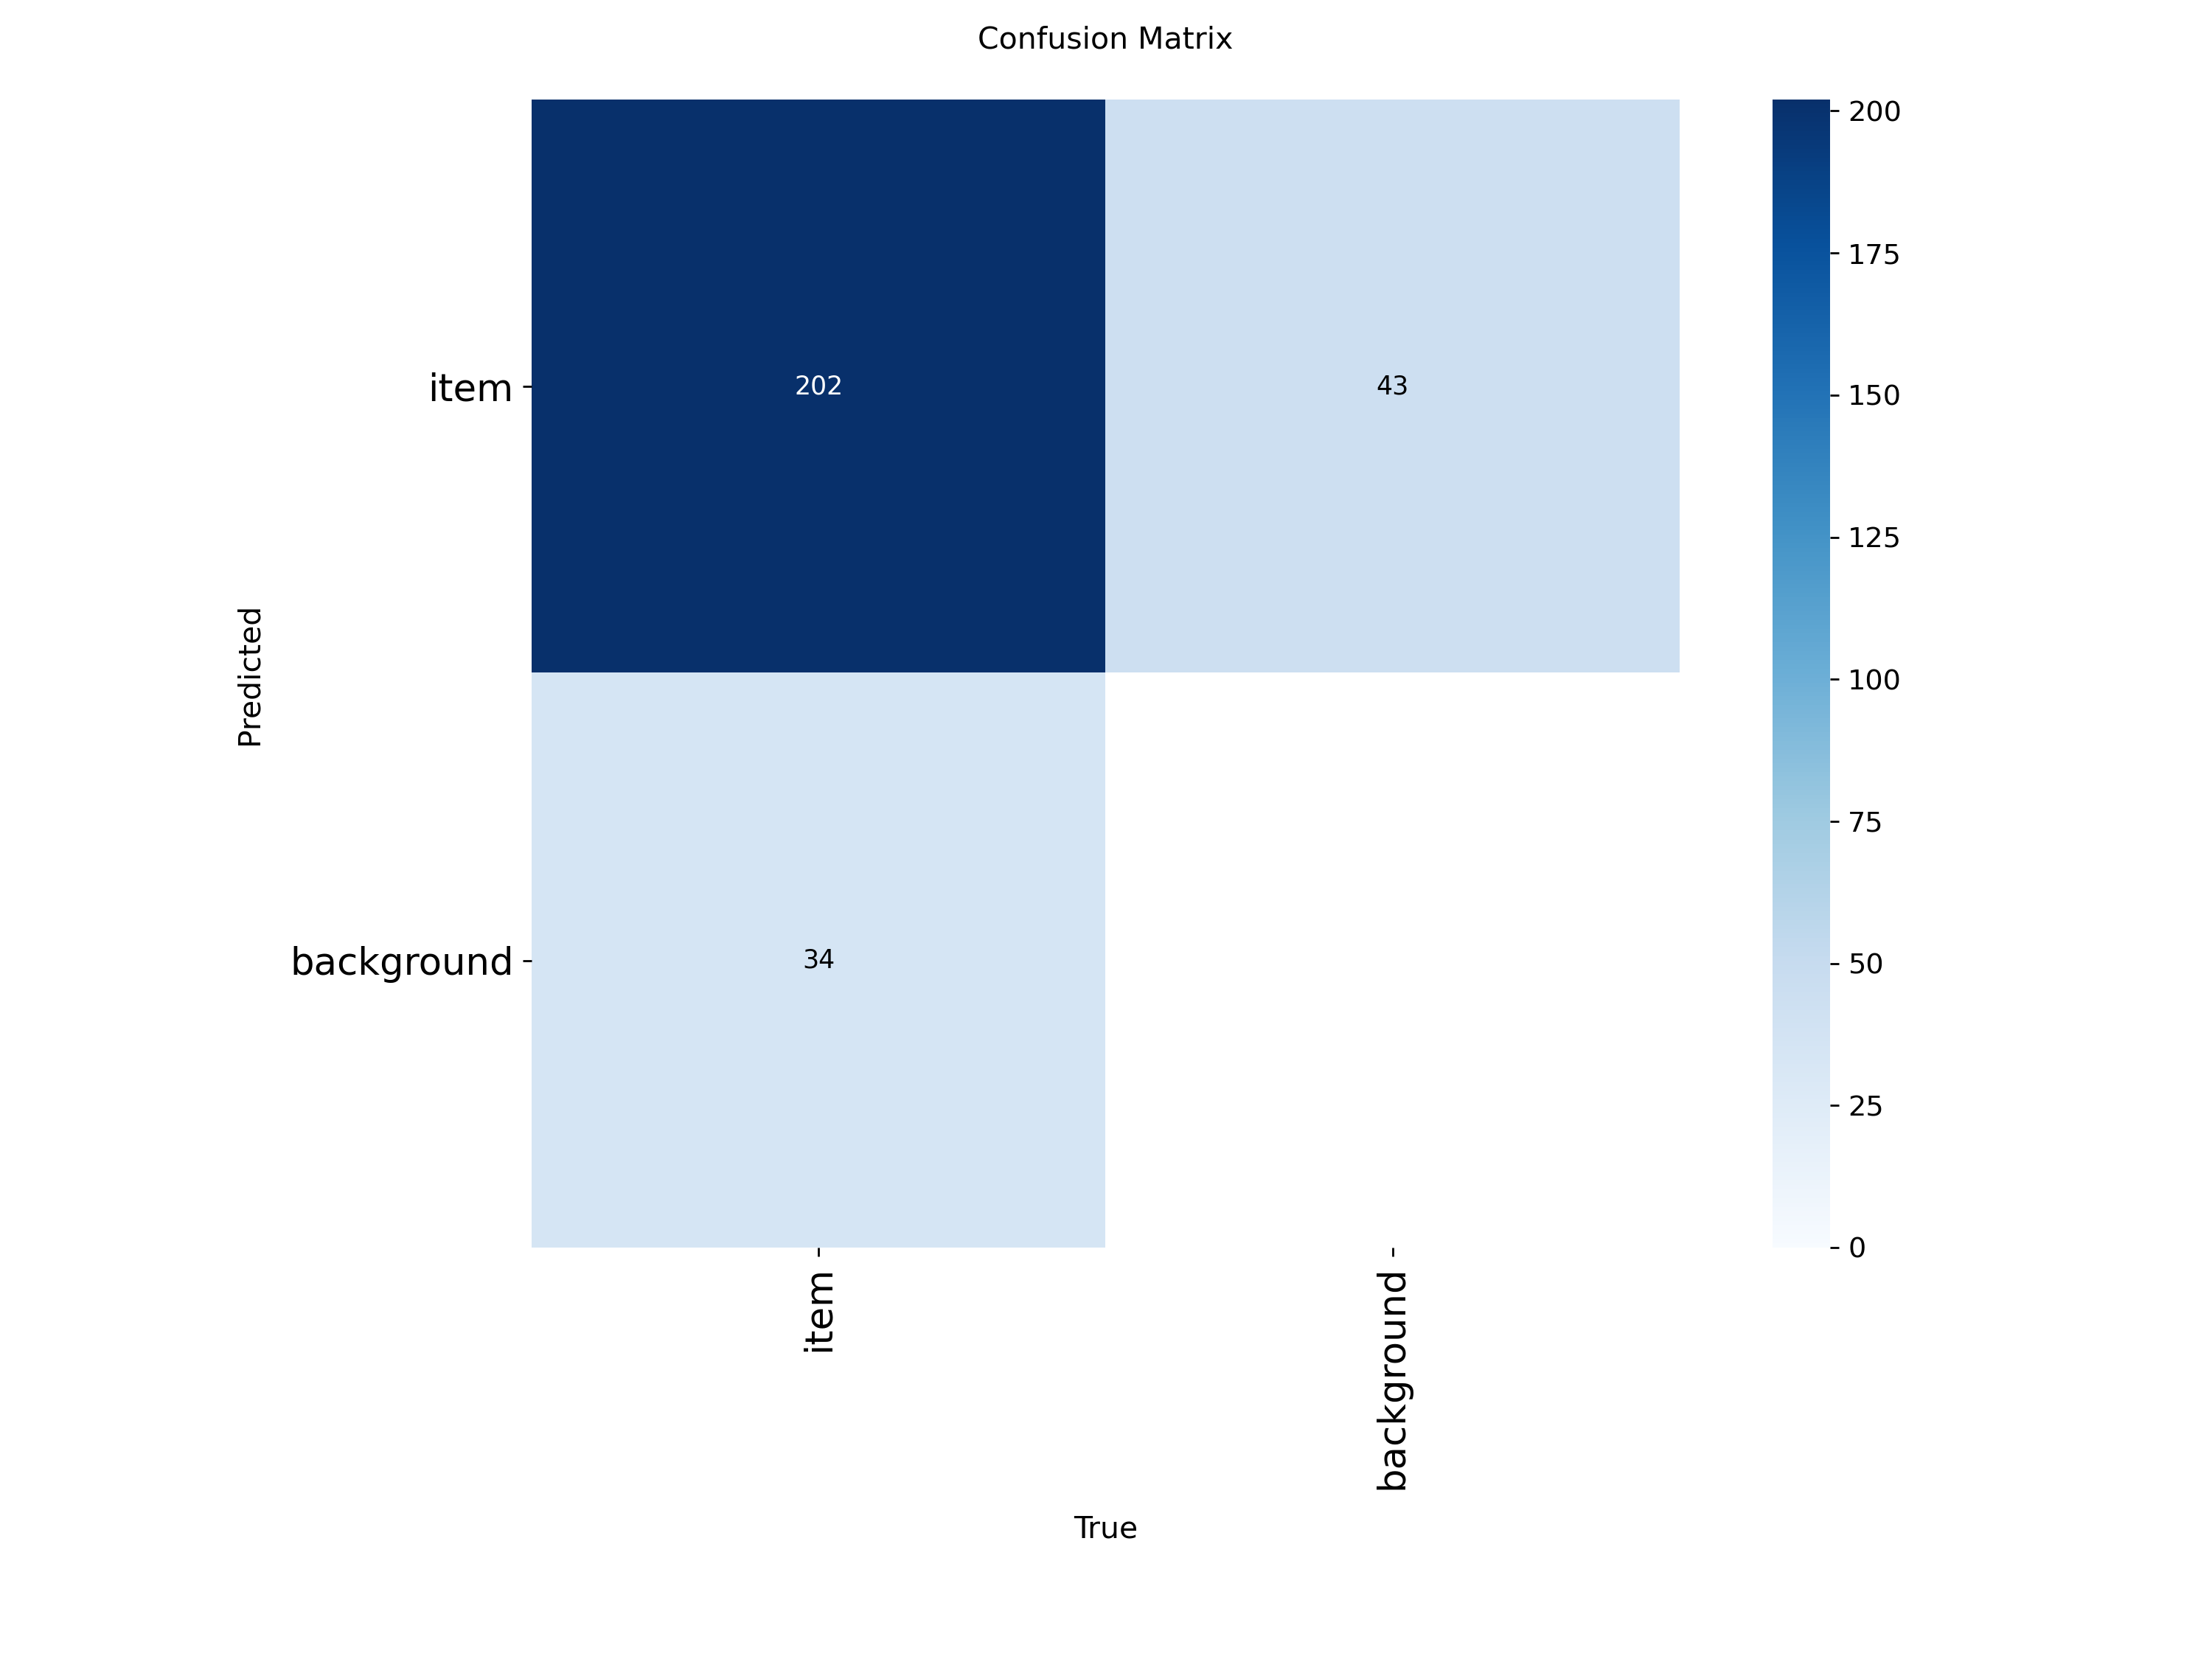

In [4]:
from ultralytics import YOLO
from pathlib import Path

DATA_YAML = ROOT / "configs" / "data_yolo_split4.yaml"
model_path = ROOT / "models" / "yolo11s_det1.pt"
model_best = YOLO(model_path)
save_dir = ROOT / "reports" / "test_results" / "y11s_split3_det_single"
metrics = evaluate_yolo_model(model_path, DATA_YAML, split="test", save_dir=save_dir)
show_detection_summary(metrics, scale=0.5)

# 2. YOLO Segmentation Model Evaluation

### A. Evaluate on Raw Test Set, No cleaning in Data (Sequences Included):

Report saved to: C:\Users\Betul\Desktop\Projects\Polyp\reports\test_results\y11s_split2_seg5\markdown\yolo11s_seg_REPORT.md

**Detection Metrics (Box):**
 Precision:  0.857
 Recall:     0.641
 mAP@50:     0.765
 mAP@50-95:  0.621

**Segmentation Metrics (Mask):**
 Precision:  0.864
 Recall:     0.642
 mAP mask@50:  0.759
 mAP mask@50-95:  0.593



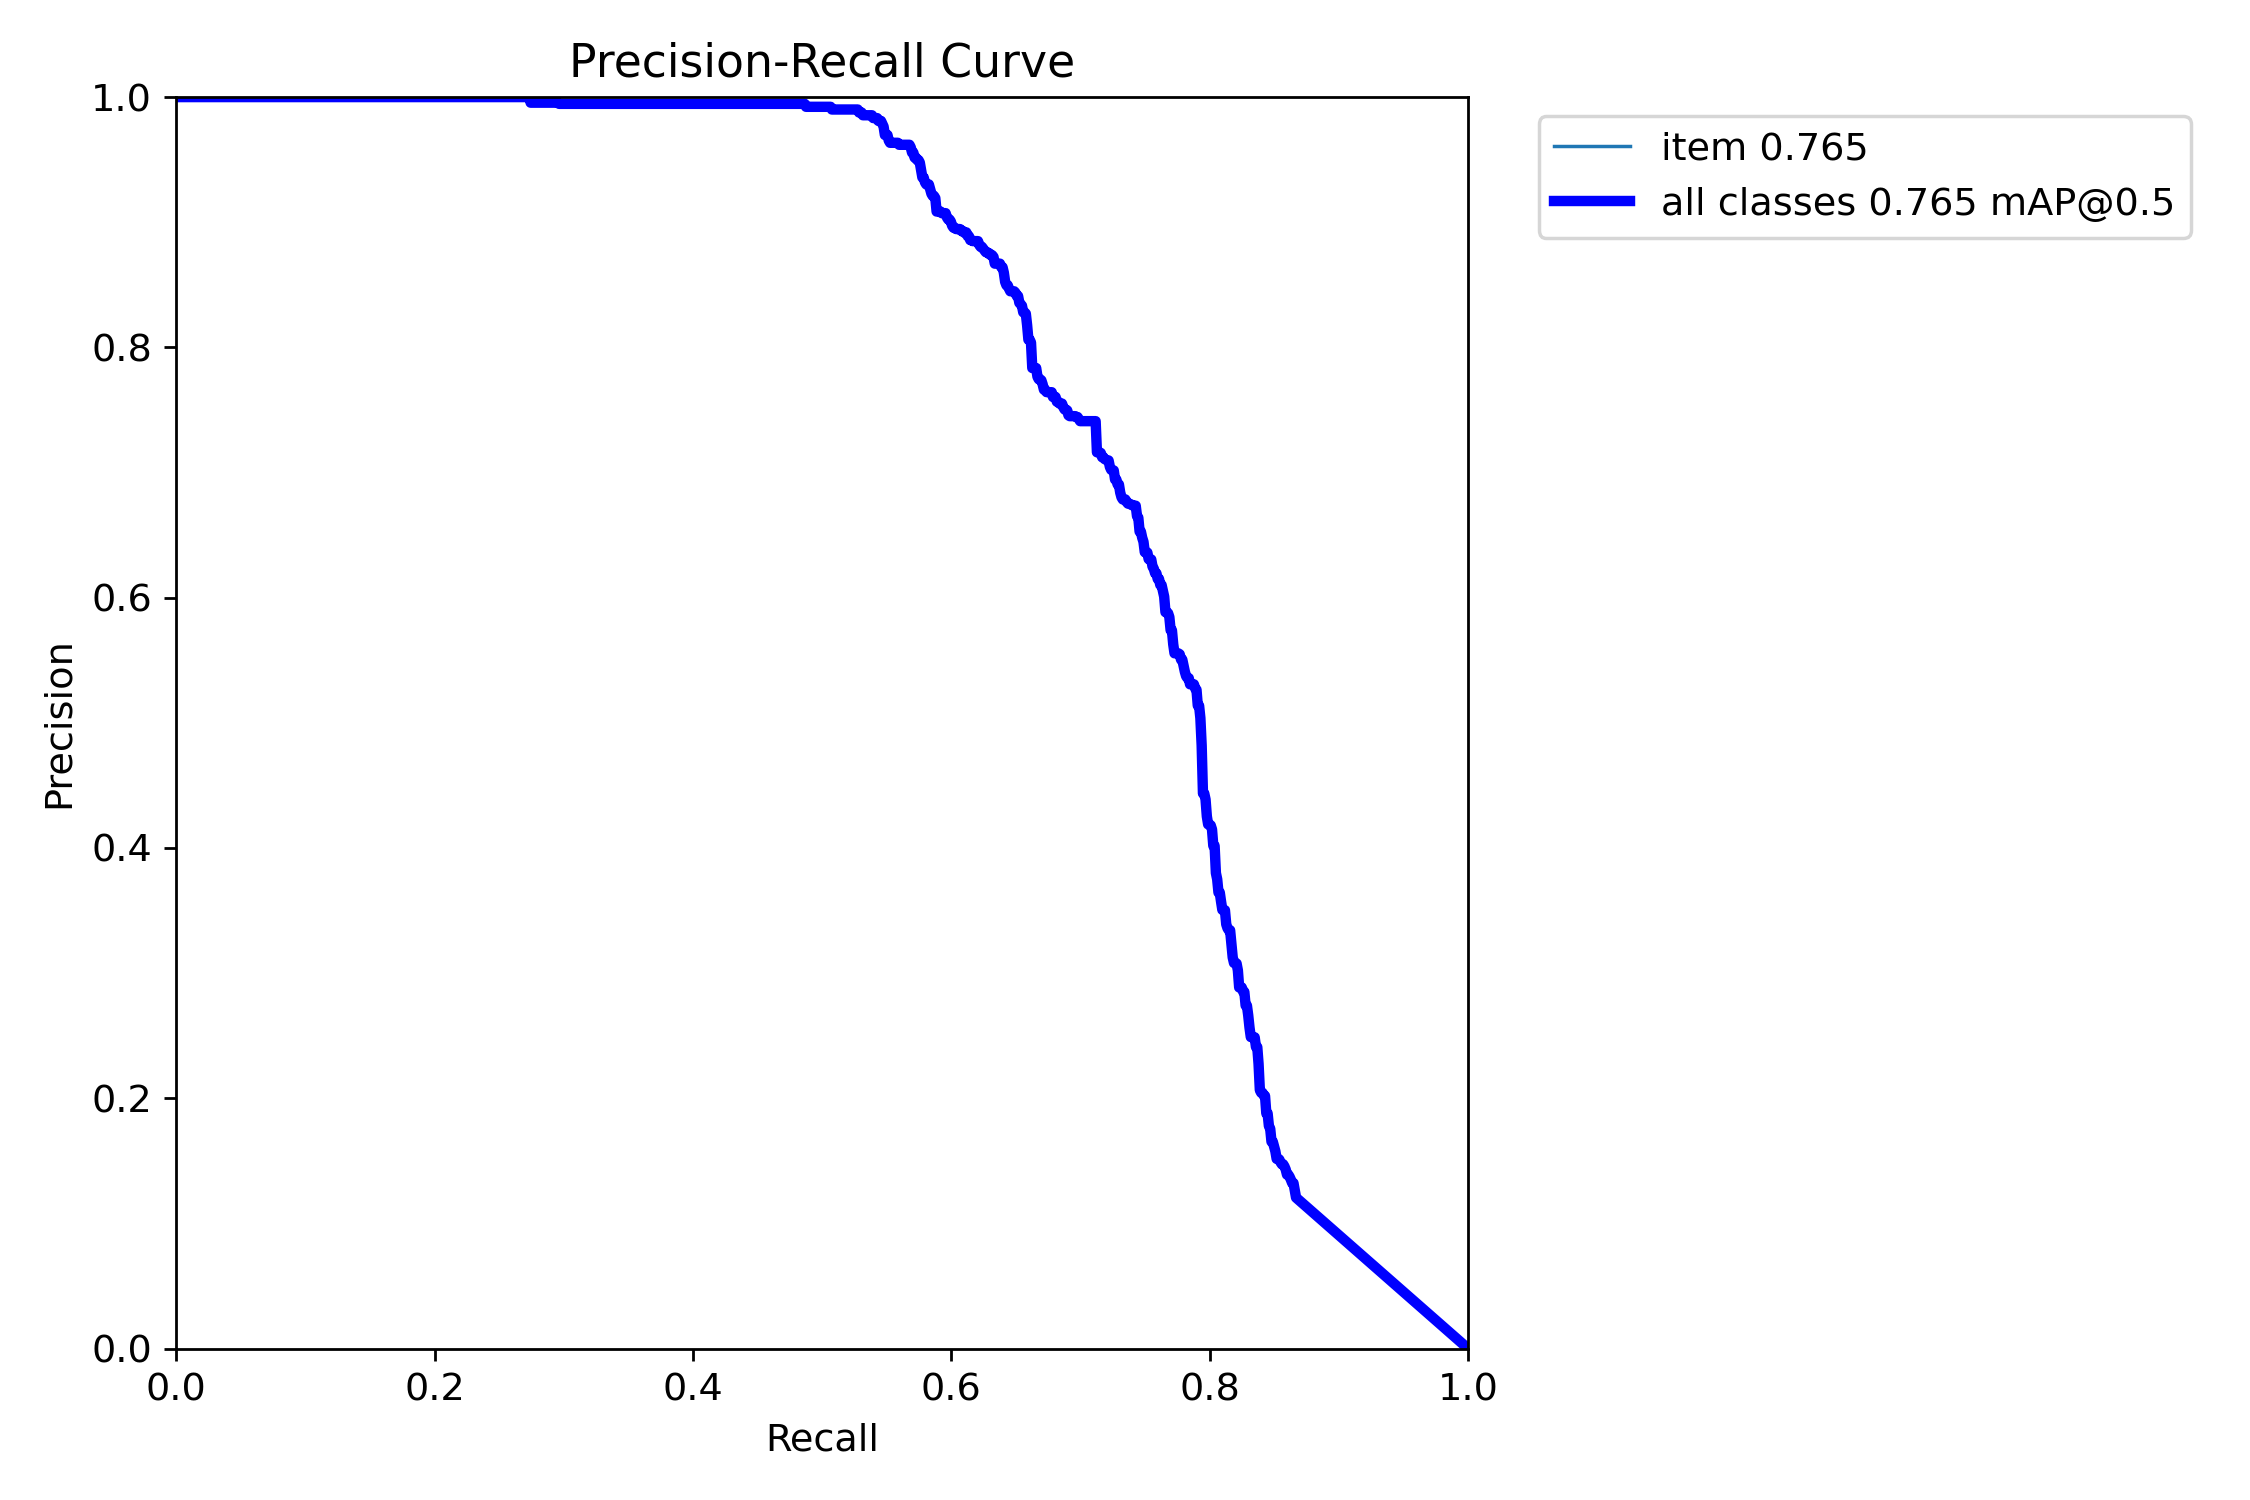
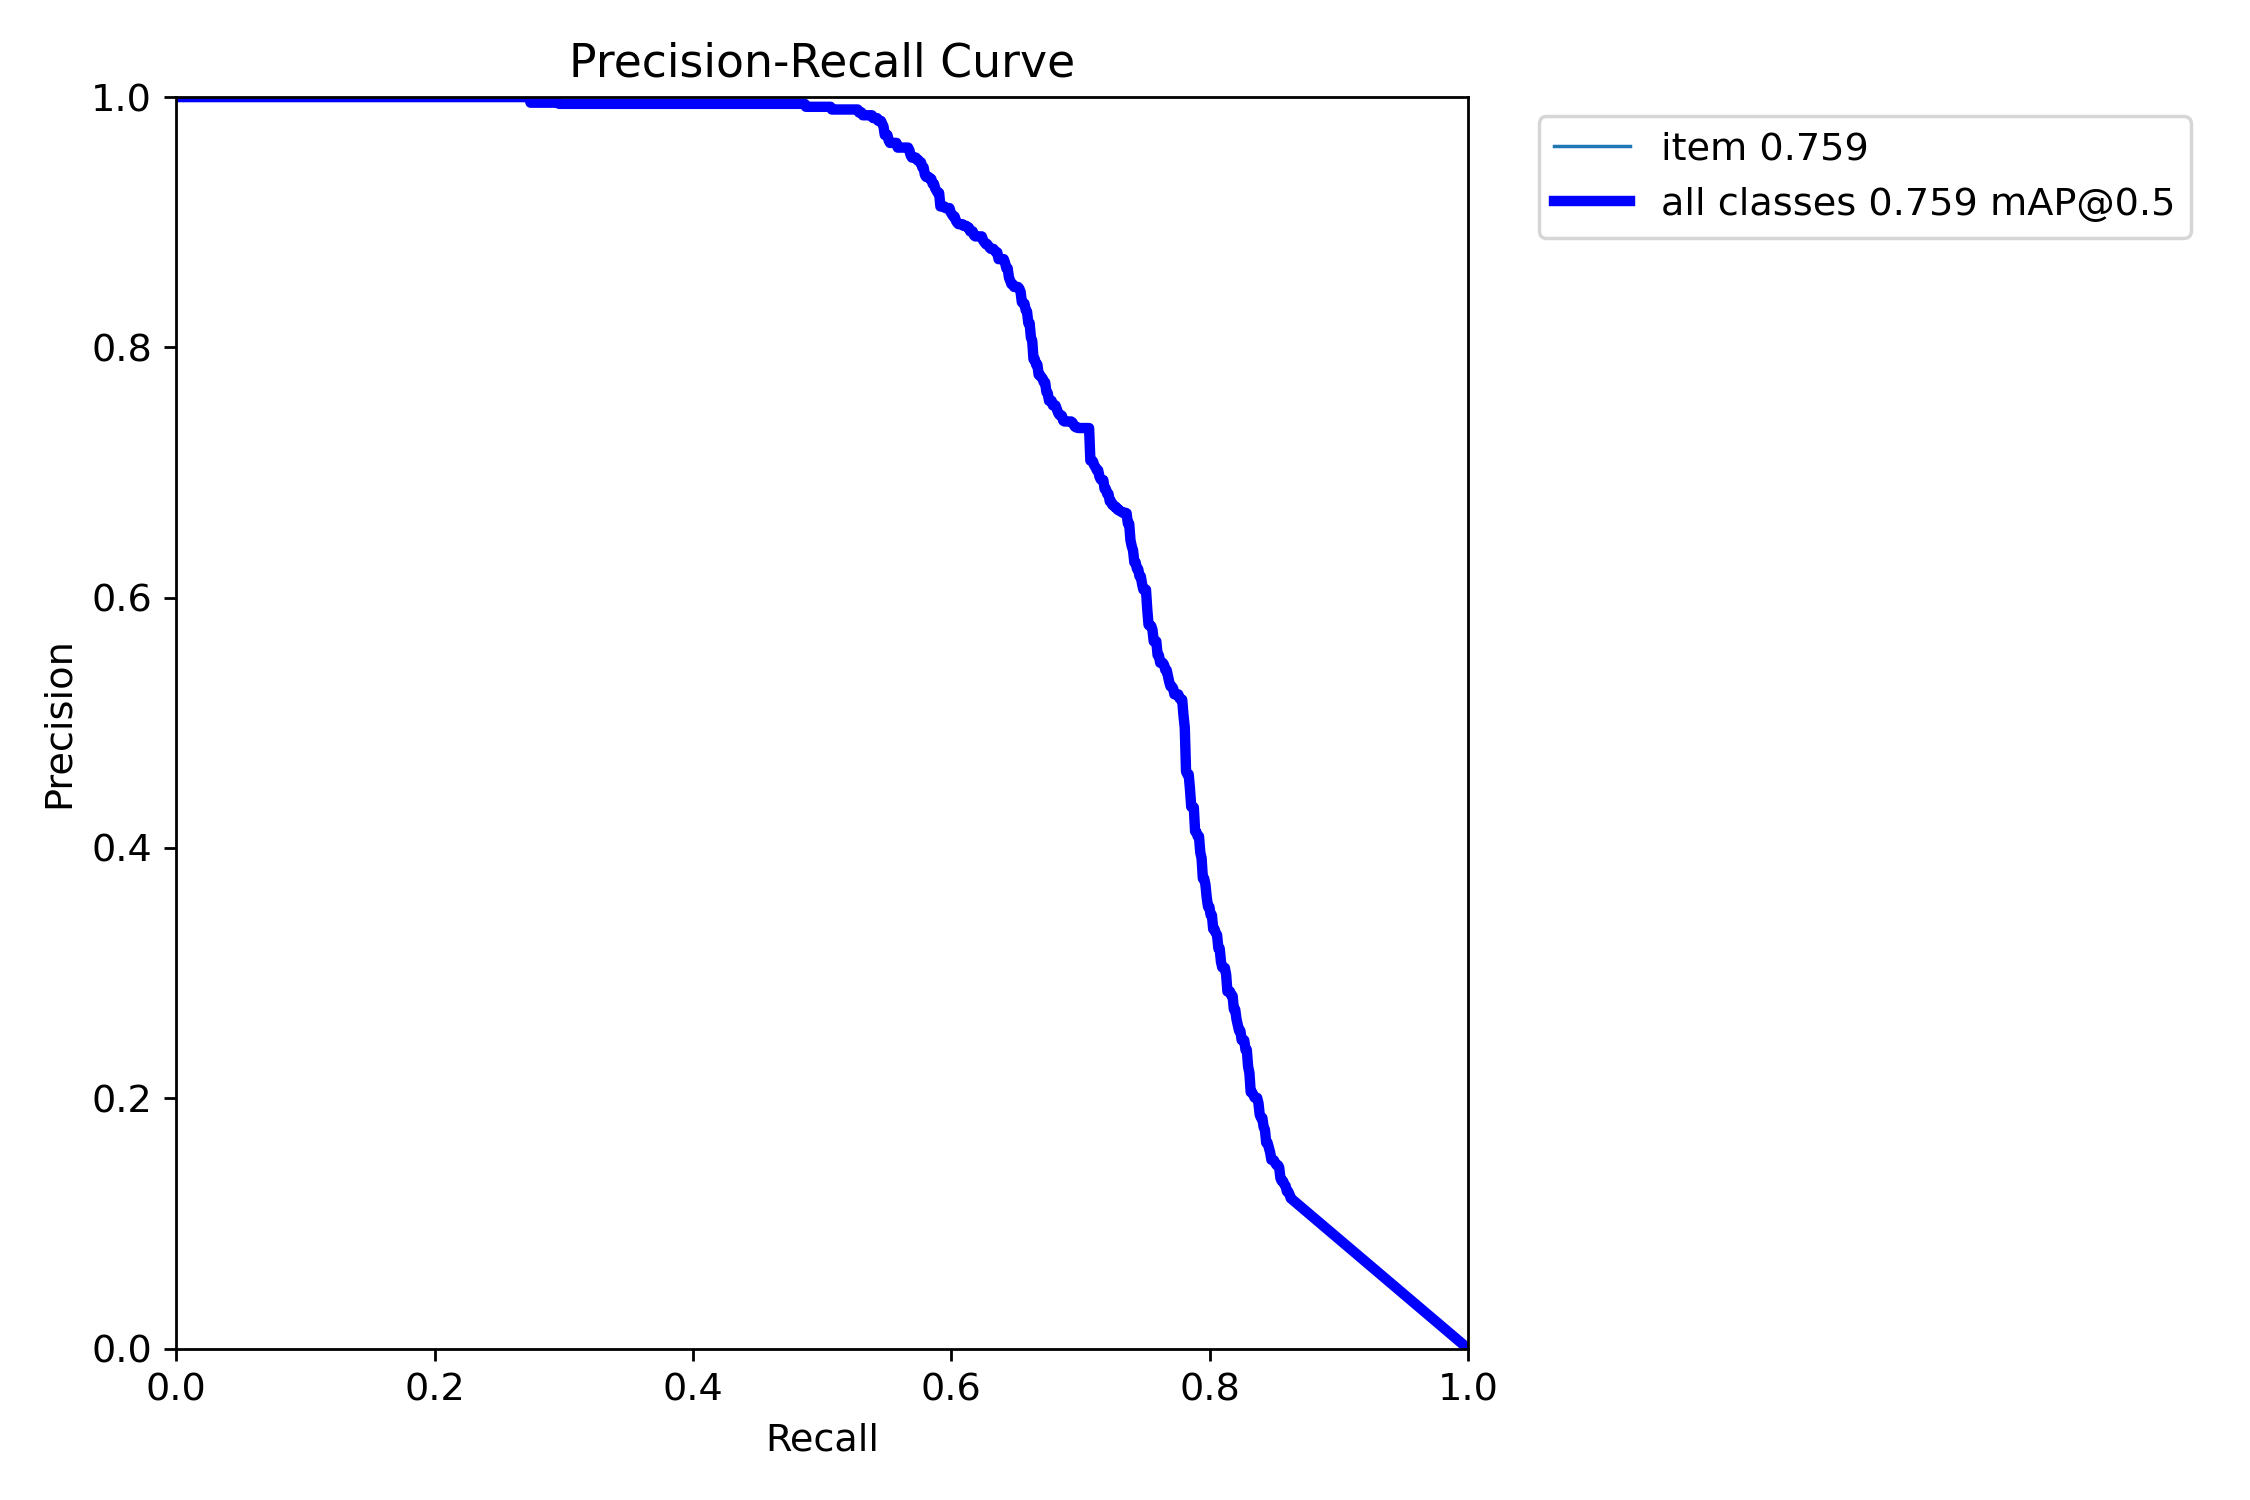
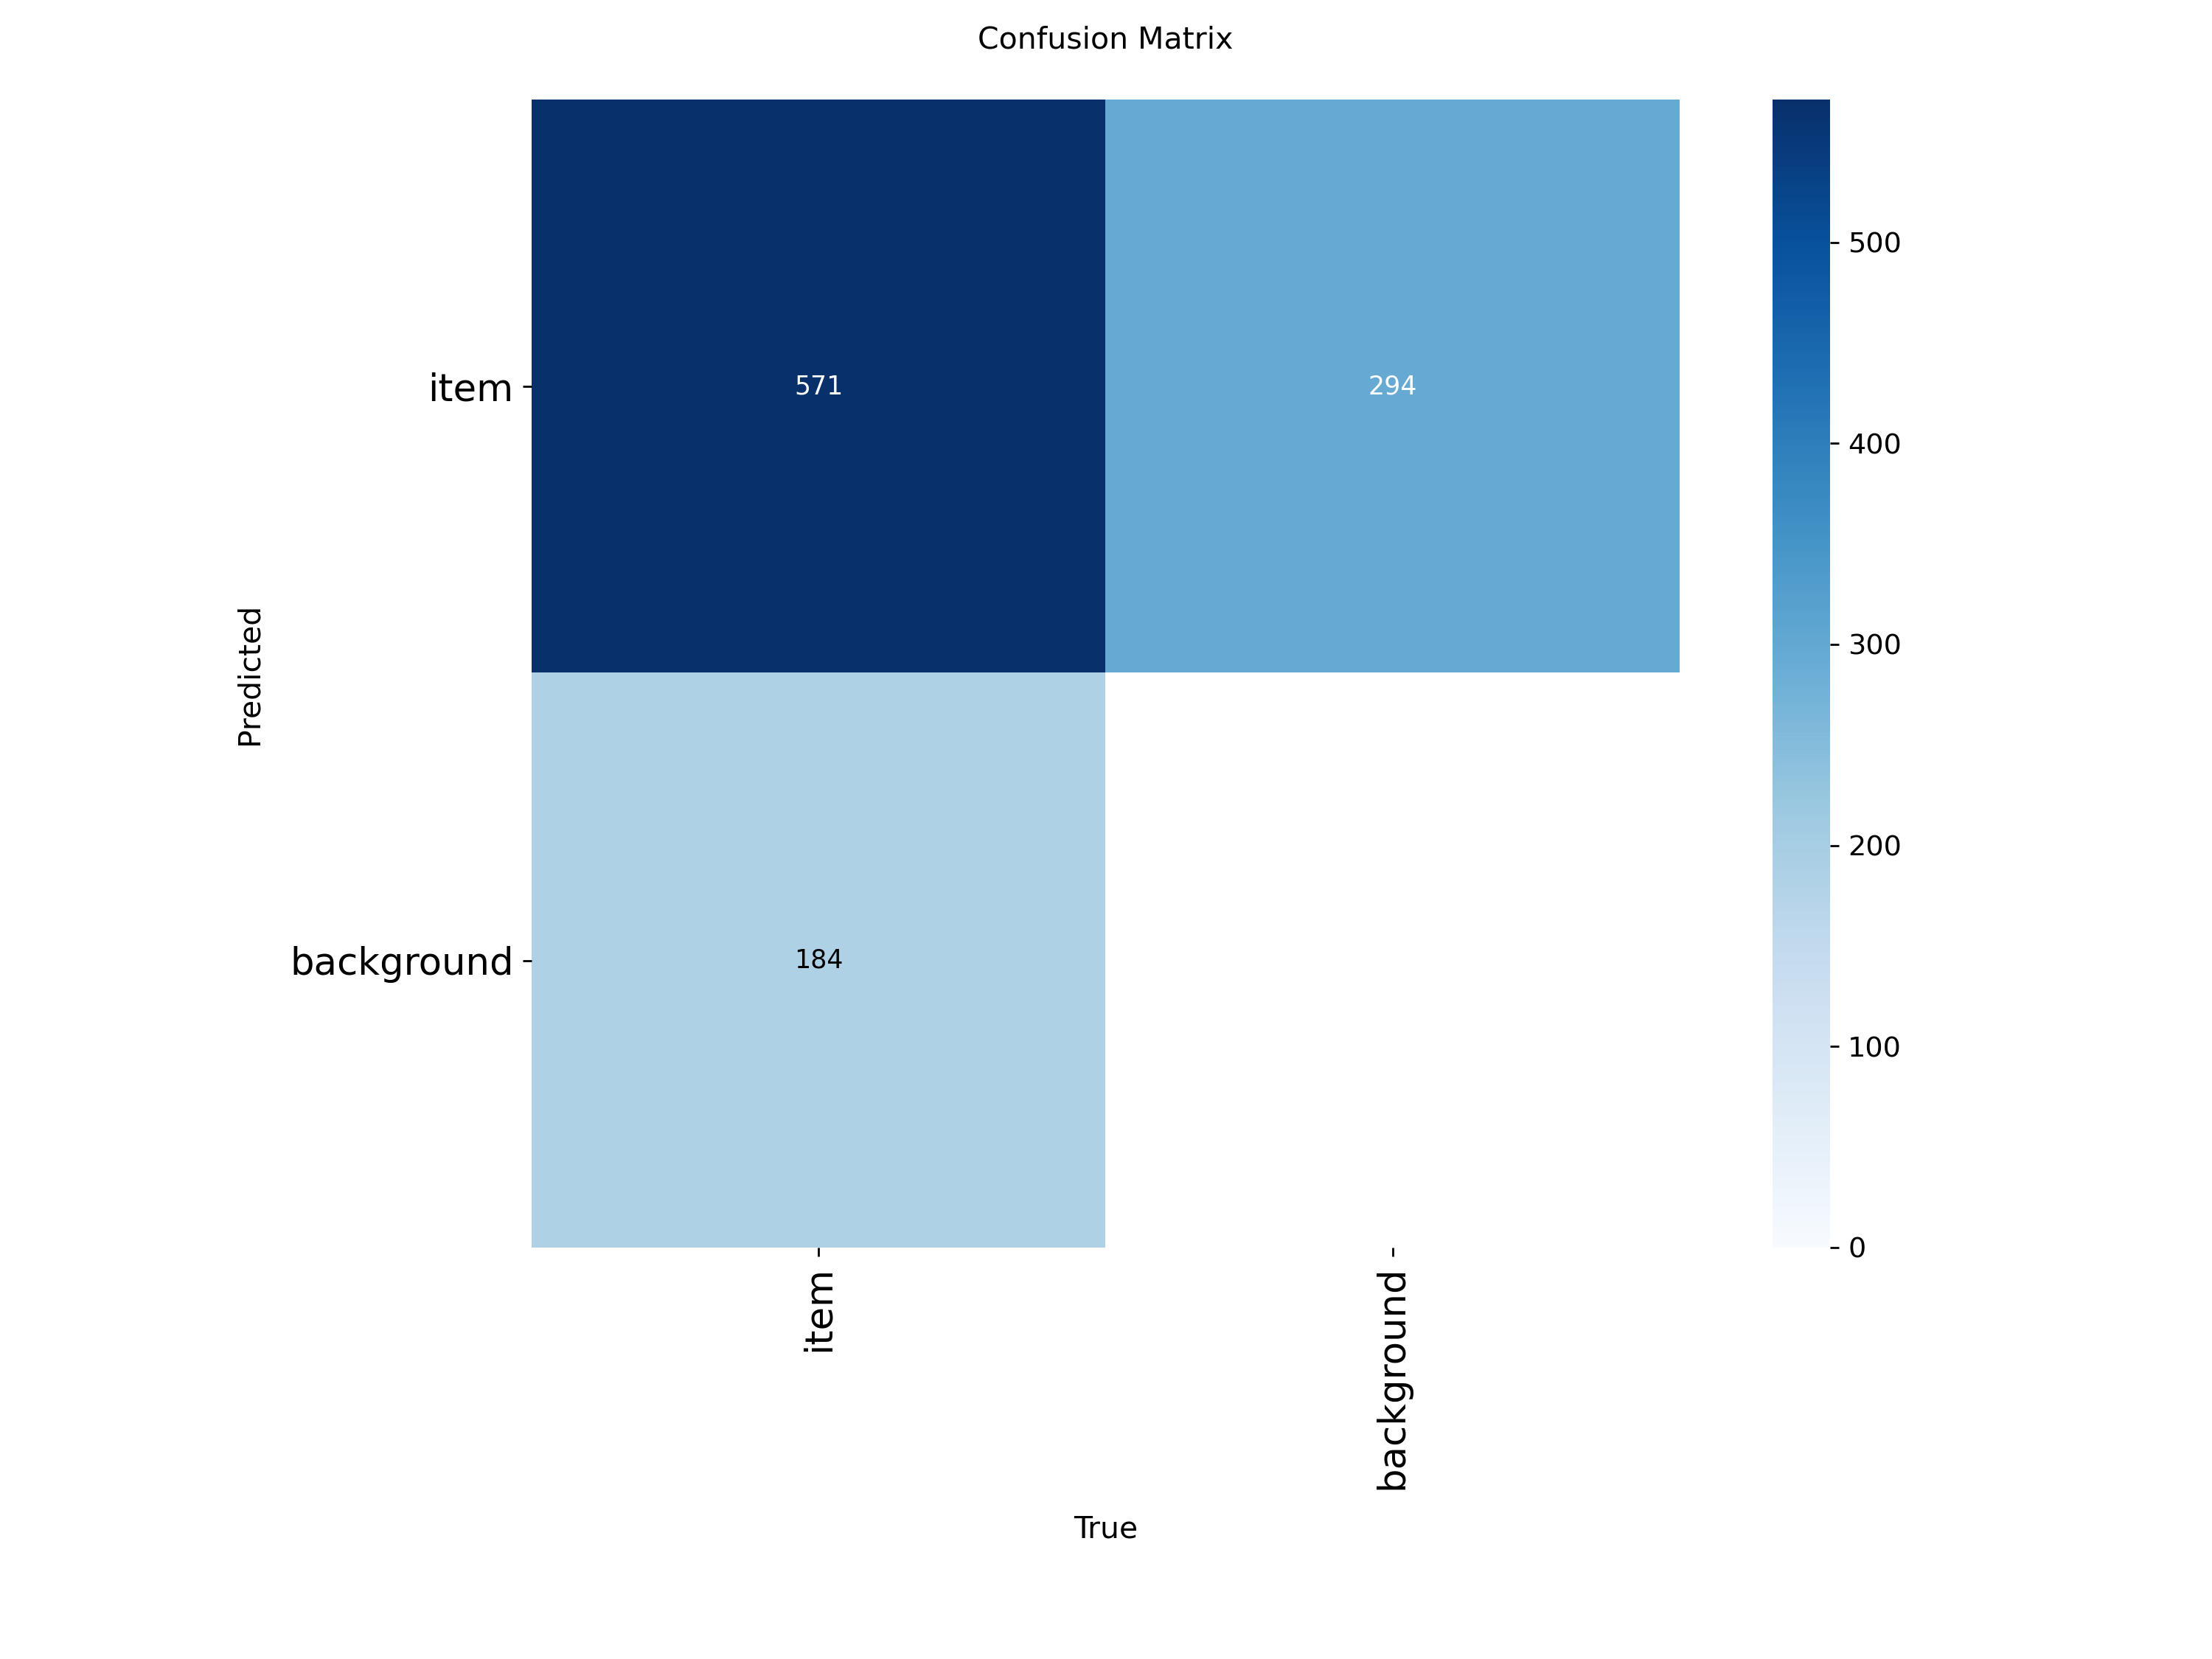

In [4]:
DATA_YAML = ROOT / "configs" / "data_seg_yolo_split2.yaml"
model_path = ROOT / "models" / "yolo11s_seg.pt"
save_dir = ROOT / "reports" / "test_results" / "y11s_split2_seg"

metrics = evaluate_yolo_model(model_path, DATA_YAML, split="test", save_dir=save_dir)
show_detection_summary(metrics, scale=0.5)

### B. Evaluate on Single Images:

Report saved to: C:\Users\Betul\Desktop\Projects\Polyp\reports\test_results\y11s_split3_seg2\markdown\yolo11s_seg_REPORT.md

**Detection Metrics (Box):**
 Precision:  0.939
 Recall:     0.839
 mAP@50:     0.918
 mAP@50-95:  0.712

**Segmentation Metrics (Mask):**
 Precision:  0.930
 Recall:     0.831
 mAP mask@50:  0.910
 mAP mask@50-95:  0.692



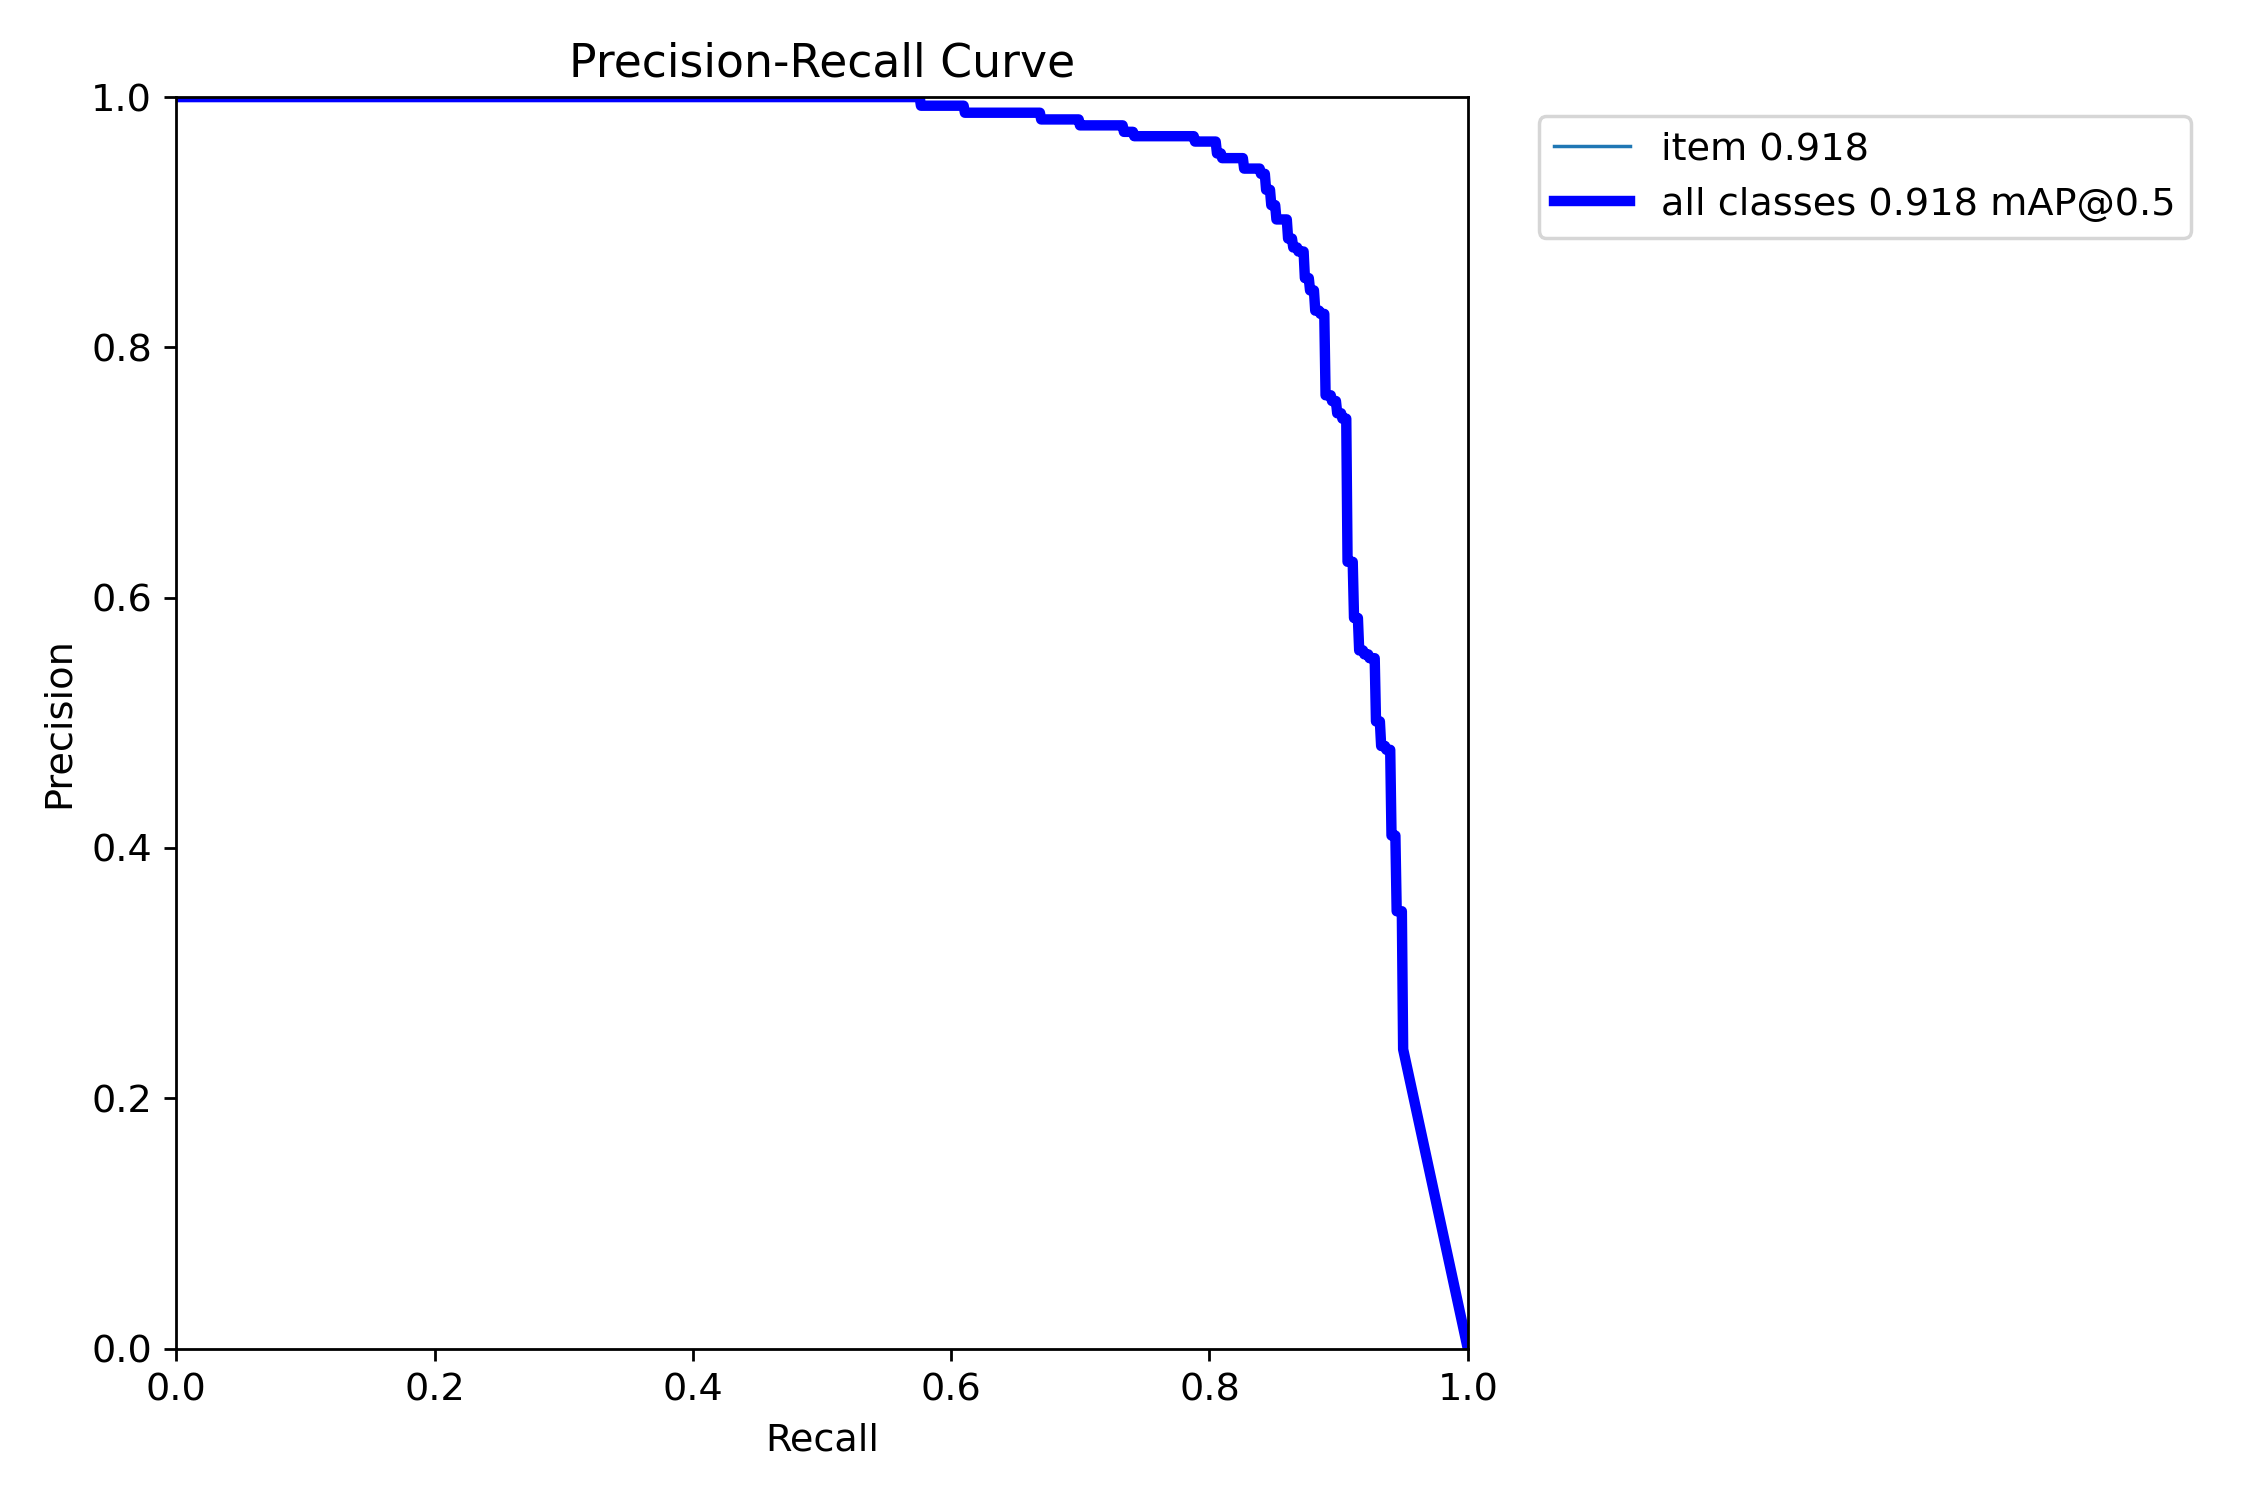
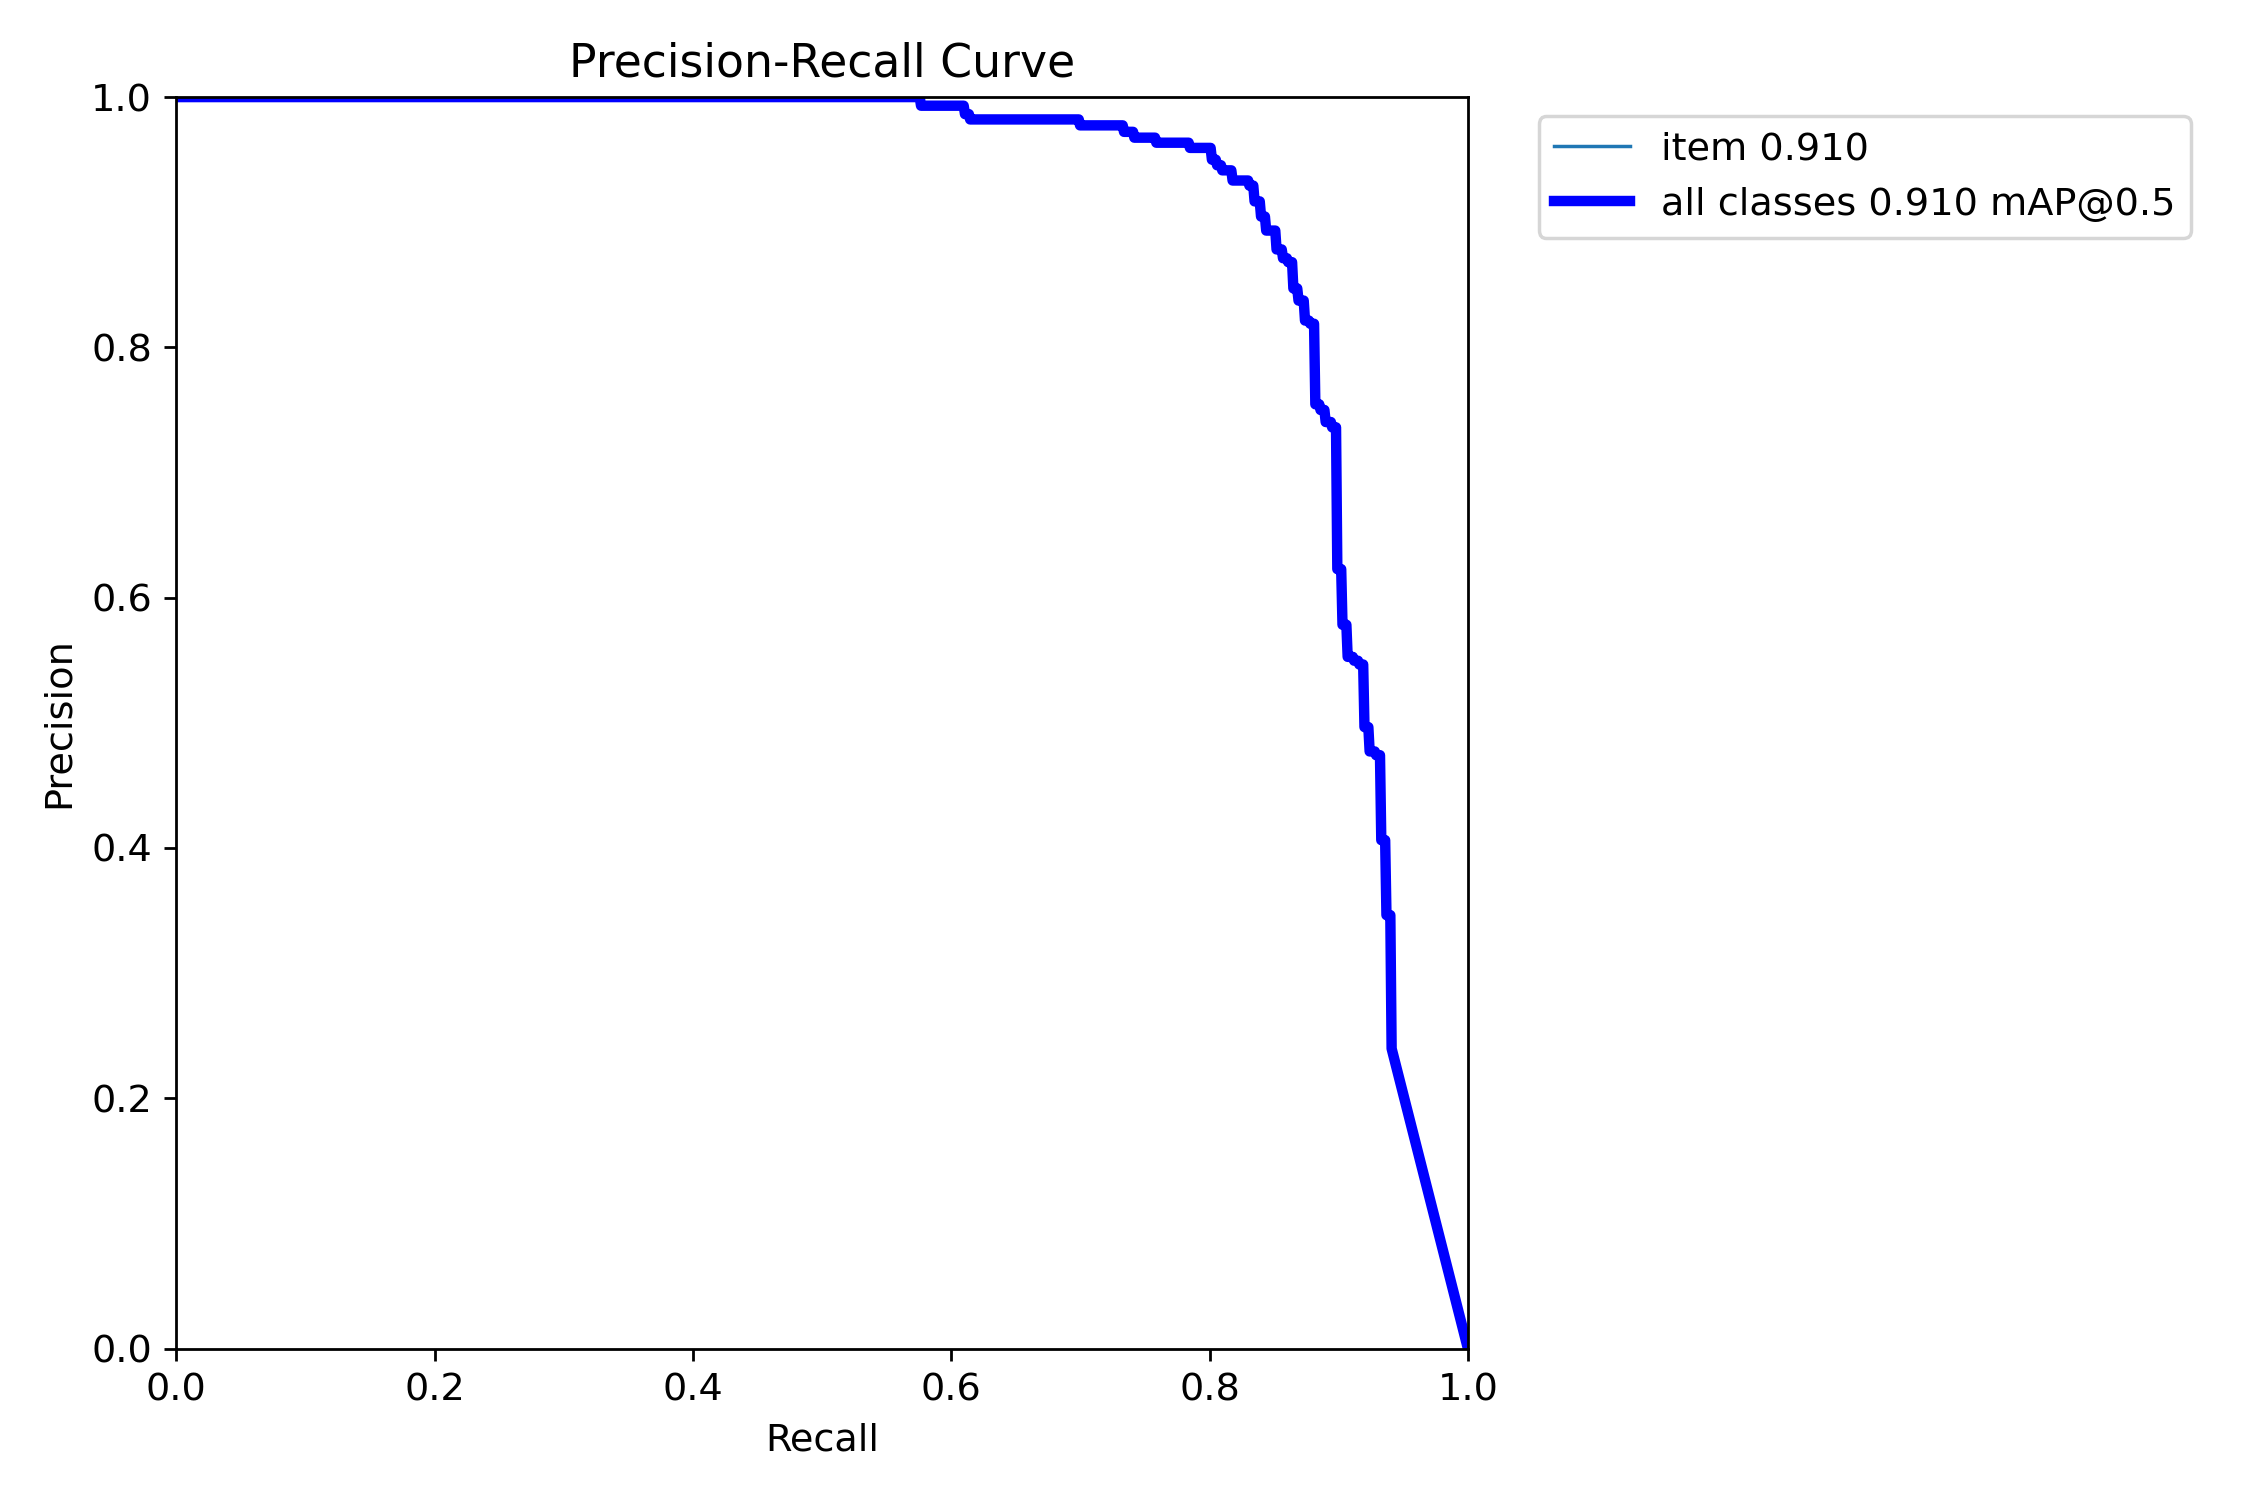
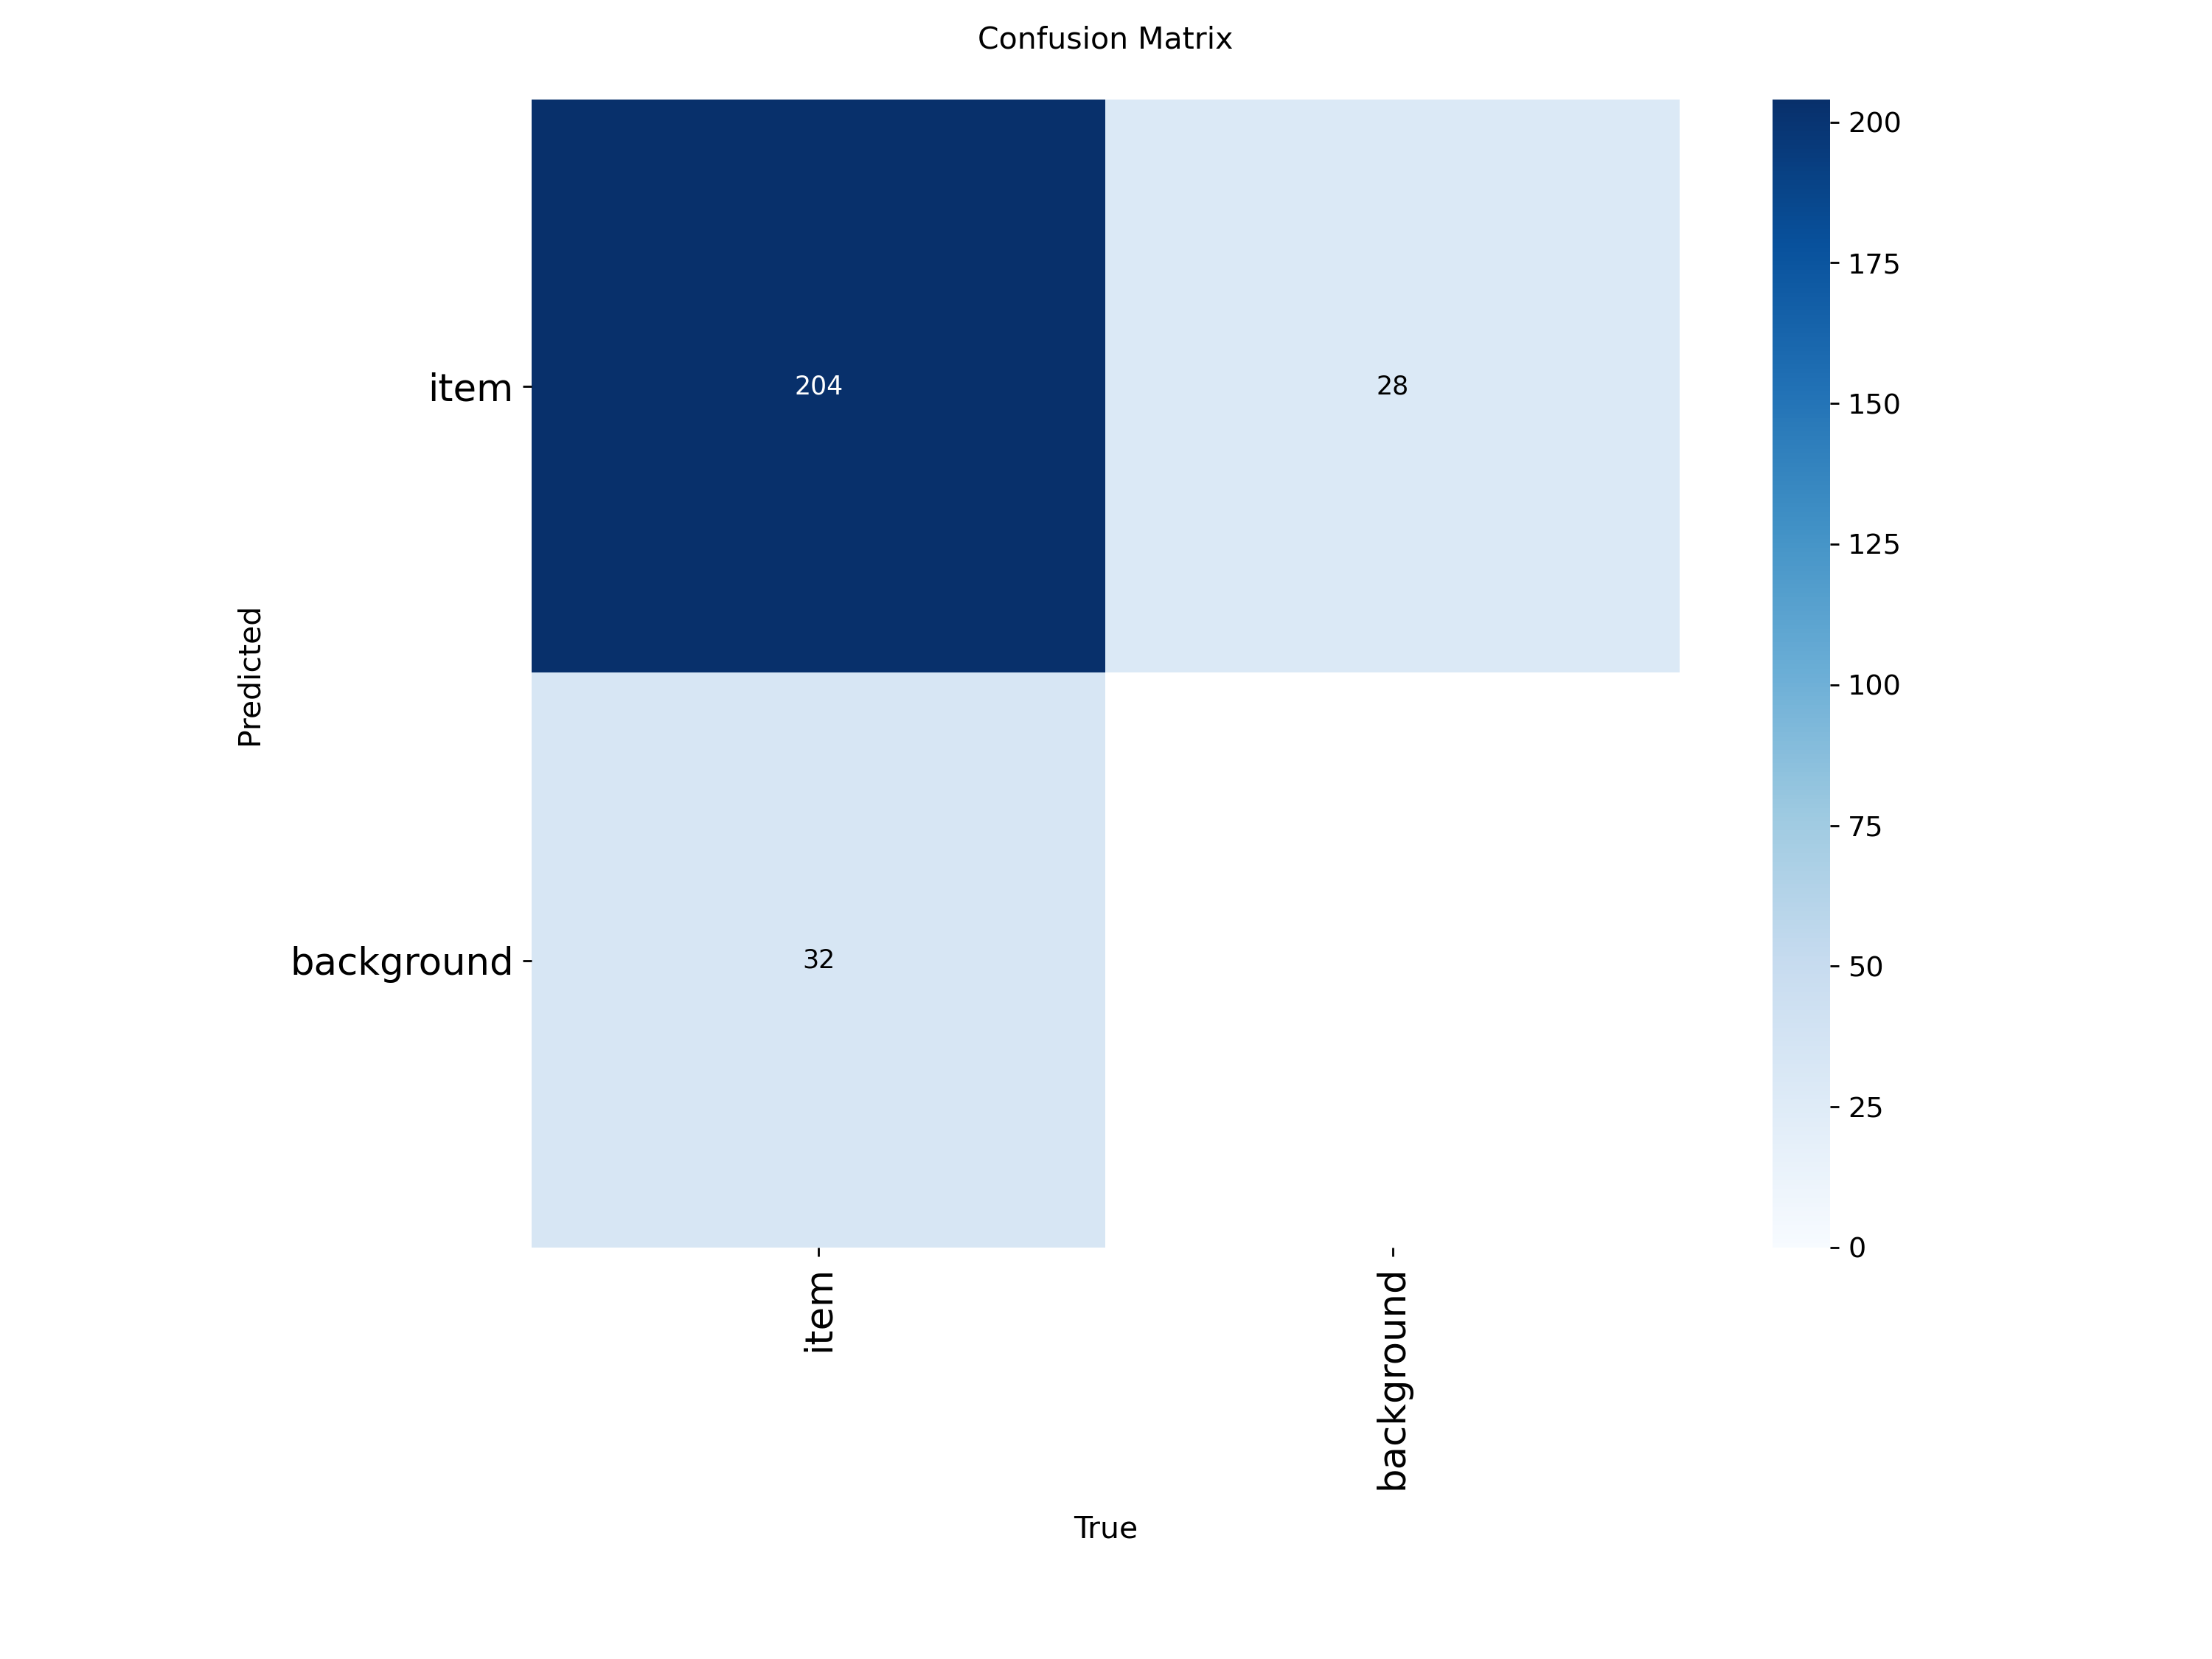

In [5]:
DATA_YAML = ROOT / "configs" / "data_seg_yolo_split3.yaml"
model_path = ROOT / "models" / "yolo11s_seg.pt"
save_dir = ROOT / "reports" / "test_results" / "y11s_split3_seg"

metrics = evaluate_yolo_model(model_path, DATA_YAML, split="test", save_dir=save_dir)
show_detection_summary(metrics, scale=0.5)